# HR Analytics

**Problem Statement**

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1)The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners

2)A sizeable department has to be maintained, for the purposes of recruiting new talent

3)More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. 

In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.Since you are one of the star analysts at the firm, this project has been given to you.

**Goal of the case study**

You are required to model the probability of attrition using a supervised classification model. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

# Outline
**1)Import Libraries** -All the required libraries were imported

**2)Import Datasets** - The 6 datasets were imported

**3)Data Preprocessing**- Data Handling, Exploratory Data Analysis, Feature Engineering

**4)Model Building**- Using Decision Tree Classifier the model was trained.

**5)Model Evaluation** -The performance of the model was found out from classification report and accuracy **score**

## 1)IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
    
import warnings                                                                 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# 2)IMPORTING DATASET

We will be using 6 datasets for this project.

In [2]:
# General Data
general_data = pd.read_csv('general_data.csv')

# Survey Data
manager_survey_data = pd.read_csv('manager_survey_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')

# Office Entry and Exit Timings
in_time = pd.read_csv('in_time.csv')
out_time = pd.read_csv('out_time.csv')

# Importing Data Dictionary containing details about each variables present in all the datasets
data_dictionary = pd.read_excel('data_dictionary.xlsx')

 a)**General** Data (This Dataset contains employee general work related details.)

In [3]:
print('Shape of general_data :',general_data.shape)

Shape of general_data : (4410, 24)


In [4]:
general_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3



b)Manager Survey Data(This Dataset contains the details of survey given by the manager of every employee.)

In [5]:
print('Shape of manager_survey_data :',manager_survey_data.shape)
manager_survey_data.head(3)

Shape of manager_survey_data : (4410, 3)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3





c)Employee Survey Data(It contains the details of survey given by employee)

In [6]:
print('Shape of employee_survey_data :',employee_survey_data.shape)
employee_survey_data.head(3)

Shape of employee_survey_data : (4410, 4)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


d)In_time Data(This dataset contains the office  entry time for the  year 2015.)

In [7]:
print('Shape of in_time :',in_time.shape)
in_time.head(3)

Shape of in_time : (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

e)*Out_time* Data(This dataset contains the office exit time for the year 2015.)

In [8]:
print('Shape of out_time :',out_time.shape)
out_time.head(3)

Shape of out_time : (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2



f)Data dictionary(The Data Dictionary contains information about each variables present in all 5 datasets in excel format.)

In [9]:
data_dictionary.replace(np.nan," ")

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


# 3)DATA PRE-PROCESSING

Here we will be preparing all the datasets so as to merge them.

*Merging all the 4-datasets *

In [10]:
# First merger general_data and manager_survey_data and save it in df dataframe
df = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='inner')

# Merge employee_survey_data to df
df = pd.merge(df, employee_survey_data, on='EmployeeID', how='inner')
df.shape

(4410, 29)

**Before merging relevant details about in_time & out_time data ,we need to handle them first**

**Handling the in_time & out_time dataset**

Filling Missing values in in_time & out_time

In [11]:
in_time.fillna(0, inplace=True)
out_time.fillna(0, inplace=True)

Convert all columns (except  employee id  which is unnamed:0 ) to Datetime format .

In [12]:
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')  
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [13]:
in_time.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,1970-01-01,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,1970-01-01 00:00:00,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-2

In [14]:
total_time=in_time.append(out_time)      #appending out_time to the in_time dataset
total_time.shape

(8820, 262)

In [15]:
total_time=total_time.diff(periods=4410) # diff find the difference of two values in a df. 
total_time=total_time.iloc[4410:]        # As the diff is availble from 4410 till 8820.
total_time.reset_index(inplace=True)
total_time.head()

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 d

In [16]:
total_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)  #removing columns to calculate mean time 
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:

In [17]:
# remove all 0 columns which representing holidays 
total_time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05','2015-05-01','2015-07-17','2015-09-17',  
                 '2015-10-02','2015-11-09','2015-11-10','2015-11-11','2015-12-25'], axis = 1,inplace=True)    

In [18]:
total_time['mean_time']=total_time.mean(axis=1)   # Finding mean of each row 

In [19]:
total_time.head(3)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [20]:
#Converting mean time to hours
total_time.mean_time = total_time.mean_time.apply(lambda x : int(str(x).split(' ')[2].split(':')[0]) + int((str(x).split(' ')[2].split(':')[1]))/60
                           + float((str(x).split(' ')[2].split(':')[2]))/3600)

In [21]:
total_time.reset_index(inplace=True)  # Again adding a columns for employee id 

total_time.head(3)

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 0

In [22]:
total_time.drop(columns=['index'],axis=1,inplace=True)              #removing columns to calculate mean time 
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [23]:
# menambah kolom EmployeeID
# kebetulan id dimulai dari angka 1 - 4410
total_time['EmployeeID'] = np.arange(1, len(total_time) + 1)

In [24]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time,EmployeeID
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 day

In [25]:
# drop semua kolom, kecuali kolom EmployeeID dan mean_time
total_time.drop(total_time.columns.difference(['mean_time','EmployeeID']), 1, inplace=True)
total_time.head()

,mean_time,EmployeeID
0,6.870229,1
1,7.315971,2
2,6.816081,3
3,6.789215,4
4,7.877561,5


In [26]:
total_time = total_time[['EmployeeID', 'mean_time']]
total_time.head(3)

,EmployeeID,mean_time
0,1,6.870229
1,2,7.315971
2,3,6.816081


**Merging the 5 datasets into a single dataset**

In [27]:
df_all = pd.merge(df, total_time, on='EmployeeID', how='inner')                     # Finally merge mean working time of employees to df
df_all.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081


In [28]:
df = df_all.copy()

### Data Handling

Collecting more information about our dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [30]:
# check missing value
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
mean_time                   0
dtype: int64

there are missing values in `NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, and WorkLifeBalance` columns

### handling missing value

Missing values Imputation for NumCompaniesWorked Column

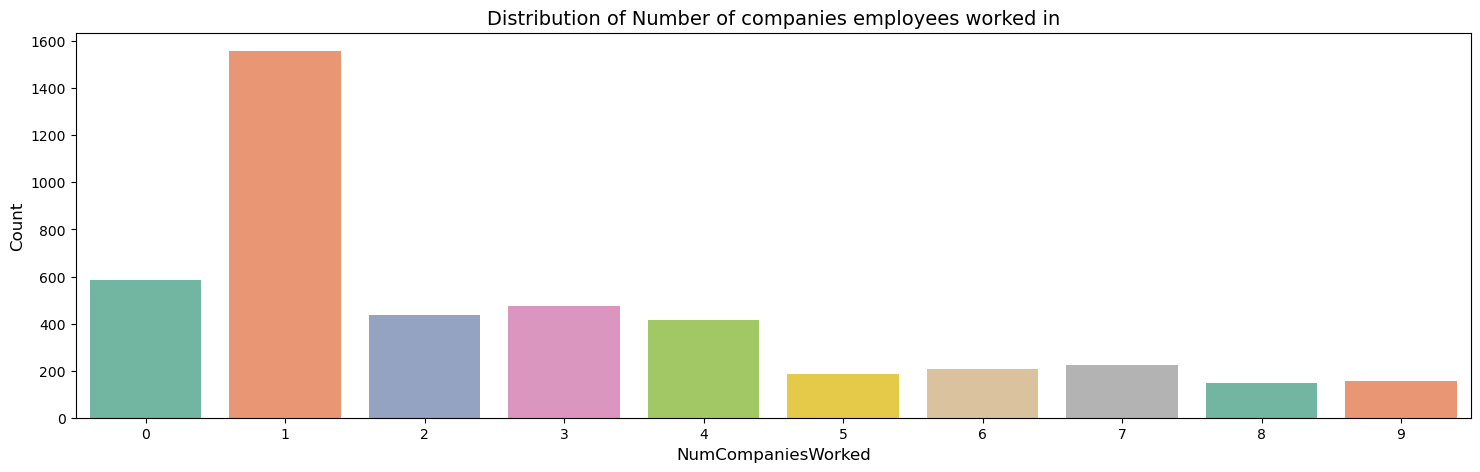

In [31]:
# distribution of MiNumCompaniesWorked
# missing value = 19
plt.figure(figsize=(18,5))
ax = sns.countplot(x='NumCompaniesWorked',data=df, palette='Set2')
ax.set(xticks=[0,1,2,3,4,5,6,7,8,9], xticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.title('Distribution of Number of companies employees worked in', fontsize=14)
ax.set_xlabel('NumCompaniesWorked',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [32]:
#filling null values with mode
df['NumCompaniesWorked'].fillna(1.0,inplace = True)

Missing values Imputation for EnvironmentalSatisfaction Column

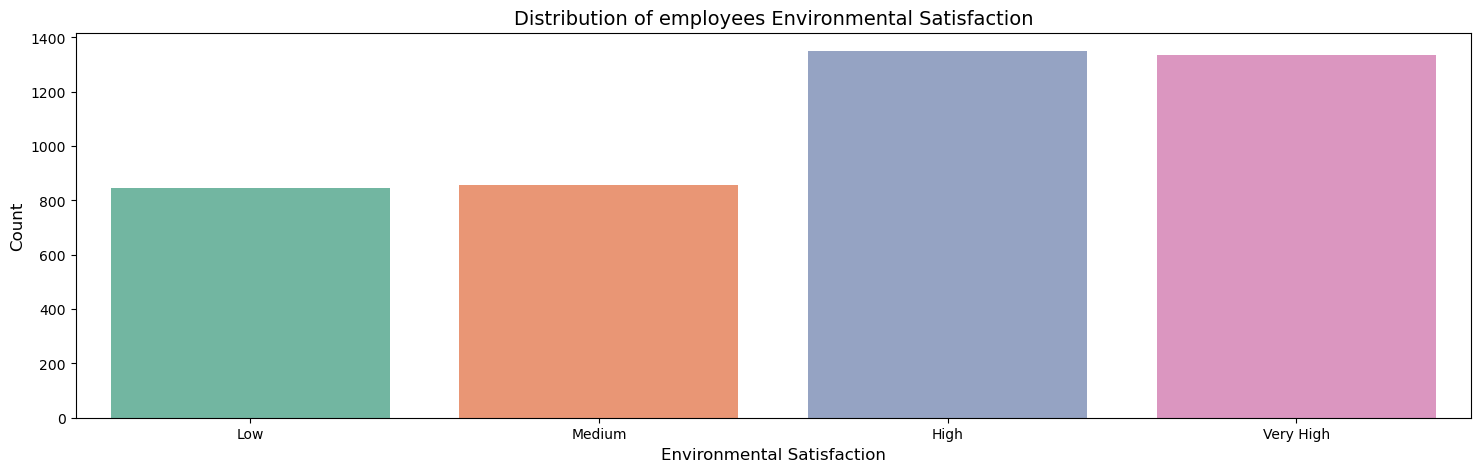

In [33]:
# Distribution of EnvironmentalSatisfaction

plt.figure(figsize=(18,5))
ax = sns.countplot(x='EnvironmentSatisfaction',data=df, palette='Set2')
ax.set(xticks=[0,1,2,3], xticklabels=['Low','Medium','High','Very High'])
plt.title('Distribution of employees Environmental Satisfaction', fontsize=14)
ax.set_xlabel('Environmental Satisfaction',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [34]:
# finding the median value of EnvironmentalSatisfaction as there are 2-modes
print('For EnvironmentSatisfaction median :', df.EnvironmentSatisfaction.median())       

For EnvironmentSatisfaction median : 3.0


In [35]:
#filling null values with median 3
df['EnvironmentSatisfaction'].fillna(3.0,inplace = True)                         

Missing values Imputation for JobSatisfaction Column

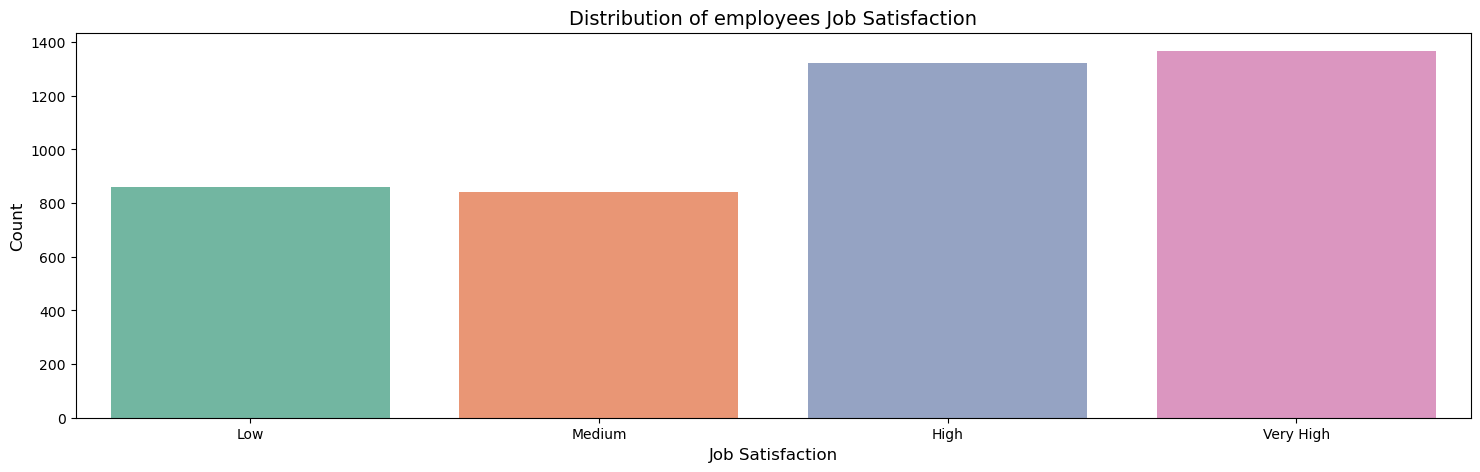

In [36]:
# distribution of JobSatisfaction

plt.figure(figsize=(18,5))
ax = sns.countplot(x='JobSatisfaction',data=df, palette='Set2')
ax.set(xticks=[0,1,2,3], xticklabels=['Low','Medium','High','Very High'])
plt.title('Distribution of employees Job Satisfaction', fontsize=14)
ax.set_xlabel('Job Satisfaction',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [37]:
#finding median as there are 2 modes
df.JobSatisfaction.median()  

3.0

In [38]:
#filling null values with median 3
df['JobSatisfaction'].fillna(3.0,inplace = True)                         

Missing values imputation for WorkLifeBalance Column

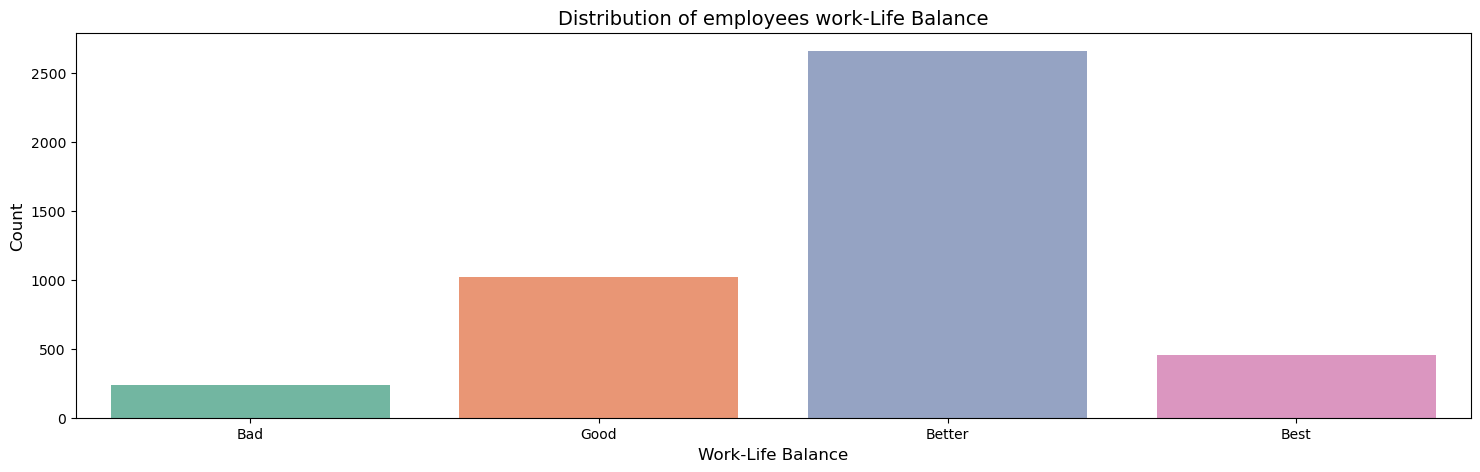

In [39]:
# distribution of WorkLifeBalance
plt.figure(figsize=(18,5))
ax = sns.countplot(x='WorkLifeBalance',data=df, palette='Set2')
ax.set(xticks=[0,1,2,3], xticklabels=['Bad','Good','Better','Best'])
plt.title('Distribution of employees work-Life Balance', fontsize=14)
ax.set_xlabel('Work-Life Balance',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [40]:
#replacing null values with mode
df['WorkLifeBalance'].fillna(3.0,inplace = True)

Missing values Imputation for TotalWorkingYears Column

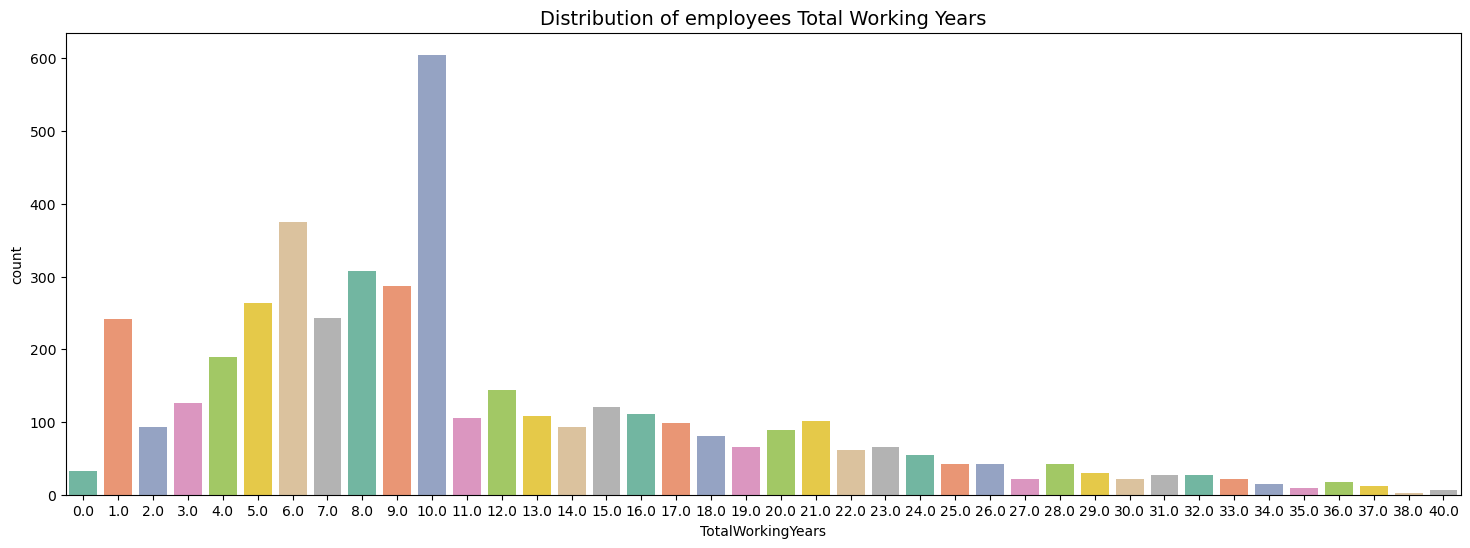

In [41]:
# Check the distribution of TotalWorkingYears
plt.figure(figsize = (18,6))
sns.countplot(x='TotalWorkingYears',data=df, palette='Set2')
plt.title('Distribution of employees Total Working Years', fontsize=14)
ax.set_xlabel('Total Working Years',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [42]:
print('Median of Total Working Year :',df.TotalWorkingYears.median())

Median of Total Working Year : 10.0


In [43]:
#filling null values with mediaN
df['TotalWorkingYears'].fillna(10.0,inplace = True)

In [44]:
print('Total Number of Missing Values remaining :',df.isnull().sum().sum())

Total Number of Missing Values remaining : 0


In [45]:
#removing the rows containing null values
df.dropna(inplace=True)

In [46]:
# check again to see if there are still missing values
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
mean_time                  0
dtype: int64

missing values no longer exist

### Check data duplicate

In [47]:
# number of duplicated data
df.duplicated().sum()

0

there is no duplicated data

In [48]:
df_data = df.copy()

## Data Understanding
### EDA

In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [50]:
int_cols = df_data.select_dtypes(include = ['int64','float64']).columns

for column in int_cols:
    unique_values = len(df_data[column].value_counts())
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column Age: 43
Unique values in column DistanceFromHome: 29
Unique values in column Education: 5
Unique values in column EmployeeCount: 1
Unique values in column EmployeeID: 4410
Unique values in column JobLevel: 5
Unique values in column MonthlyIncome: 1349
Unique values in column NumCompaniesWorked: 10
Unique values in column PercentSalaryHike: 15
Unique values in column StandardHours: 1
Unique values in column StockOptionLevel: 4
Unique values in column TotalWorkingYears: 40
Unique values in column TrainingTimesLastYear: 7
Unique values in column YearsAtCompany: 37
Unique values in column YearsSinceLastPromotion: 16
Unique values in column YearsWithCurrManager: 18
Unique values in column JobInvolvement: 4
Unique values in column PerformanceRating: 2
Unique values in column EnvironmentSatisfaction: 4
Unique values in column JobSatisfaction: 4
Unique values in column WorkLifeBalance: 4
Unique values in column mean_time: 4406


In [51]:
obj_cols = df_data.select_dtypes(include = ['object']).columns

for column in obj_cols:
    unique_values = len(df_data[column].value_counts())
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column Attrition: 2
Unique values in column BusinessTravel: 3
Unique values in column Department: 3
Unique values in column EducationField: 6
Unique values in column Gender: 2
Unique values in column JobRole: 9
Unique values in column MaritalStatus: 3
Unique values in column Over18: 1


In [52]:
#drop karena jumlah unique value hanya 1, berarti semua isinya sama
df_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace = True)

In [53]:
#drop EmployeeID karena kolom ini tidak digunakan
df_data.drop(['EmployeeID'], axis = 1, inplace = True)

In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [55]:
df_data.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.687528,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.725170,2.729478,2.763492,7.314363
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.495967,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.089852,1.098904,0.703541,1.330769
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.416880
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.279408
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011174
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.900785
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


### Univariate analysis

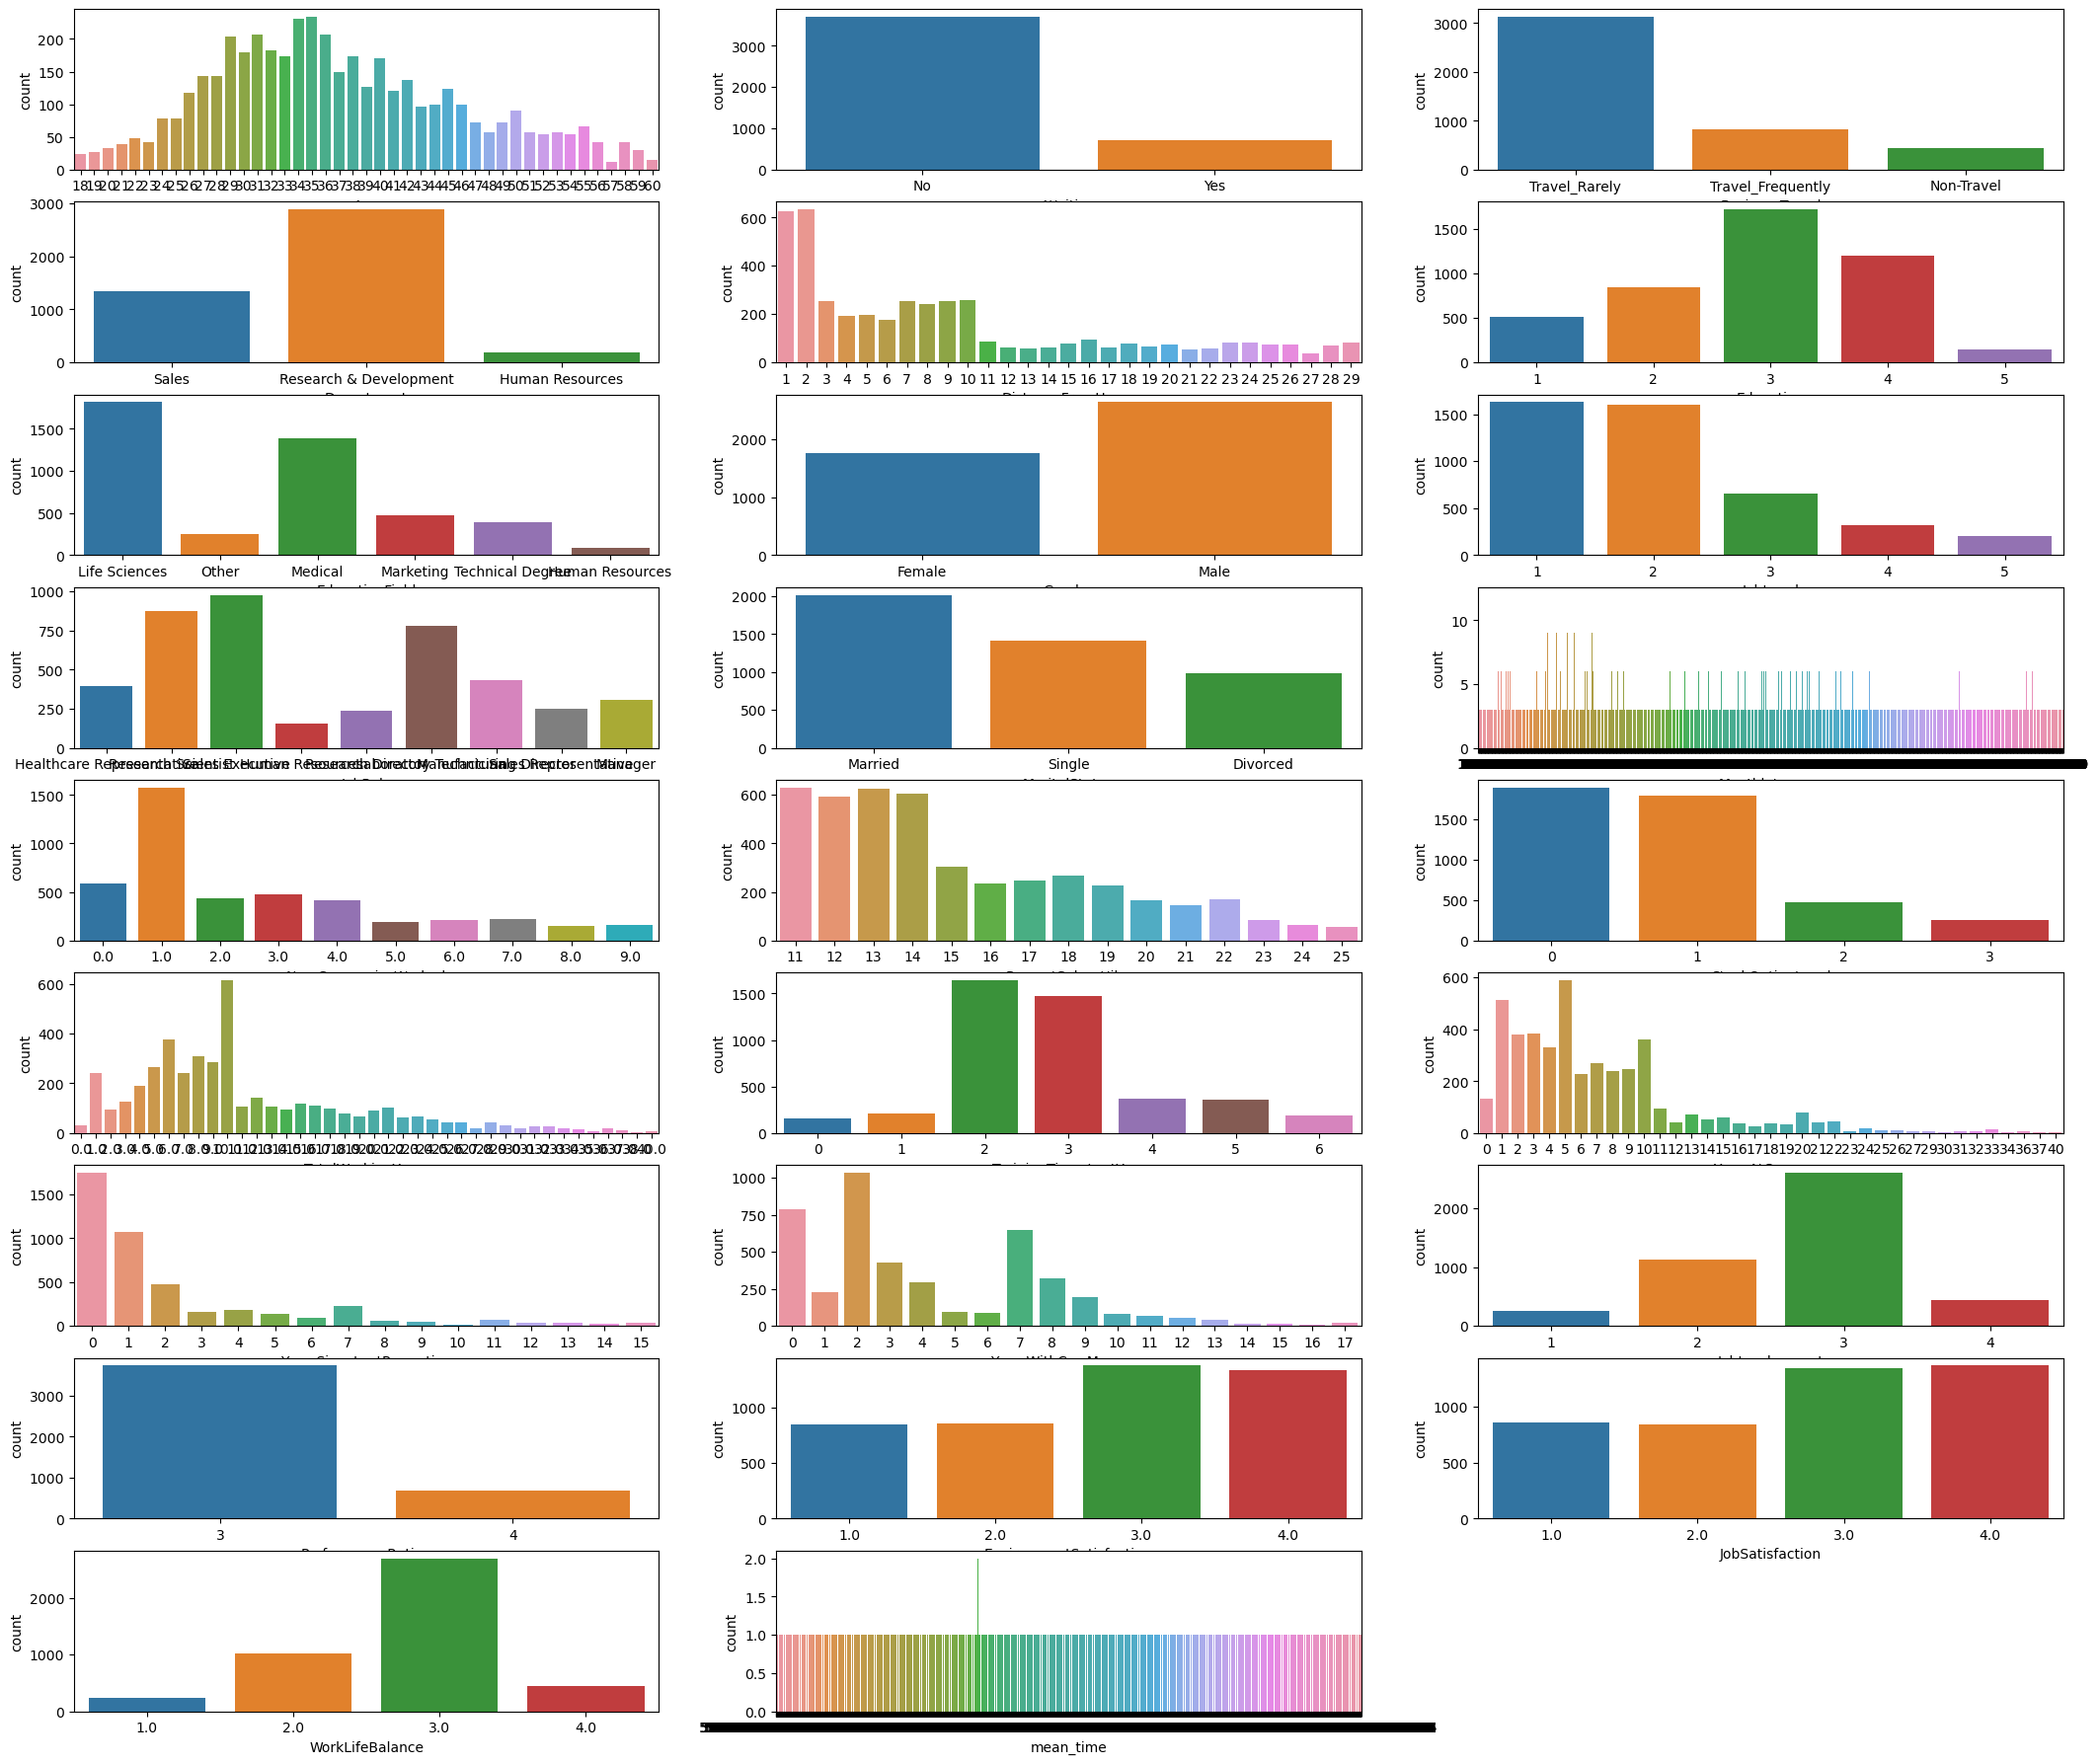

In [56]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(df_data.columns.tolist()):
    ax=plt.subplot(12,3,idx+1)
    sns.countplot(x=i,data=df_data,ax=ax)
plt.show()

In [56]:
obj_cols = df_data.select_dtypes(include = ['object']).columns

for column in obj_cols:
    unique_values = len(df_data[column].value_counts())
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column Attrition: 2
Unique values in column BusinessTravel: 3
Unique values in column Department: 3
Unique values in column EducationField: 6
Unique values in column Gender: 2
Unique values in column JobRole: 9
Unique values in column MaritalStatus: 3


In [57]:
int_cols = df_data.select_dtypes(include = ['int64','float64']).columns

for column in int_cols:
    unique_values = len(df_data[column].value_counts())
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column Age: 43
Unique values in column DistanceFromHome: 29
Unique values in column Education: 5
Unique values in column JobLevel: 5
Unique values in column MonthlyIncome: 1349
Unique values in column NumCompaniesWorked: 10
Unique values in column PercentSalaryHike: 15
Unique values in column StockOptionLevel: 4
Unique values in column TotalWorkingYears: 40
Unique values in column TrainingTimesLastYear: 7
Unique values in column YearsAtCompany: 37
Unique values in column YearsSinceLastPromotion: 16
Unique values in column YearsWithCurrManager: 18
Unique values in column JobInvolvement: 4
Unique values in column PerformanceRating: 2
Unique values in column EnvironmentSatisfaction: 4
Unique values in column JobSatisfaction: 4
Unique values in column WorkLifeBalance: 4
Unique values in column mean_time: 4406


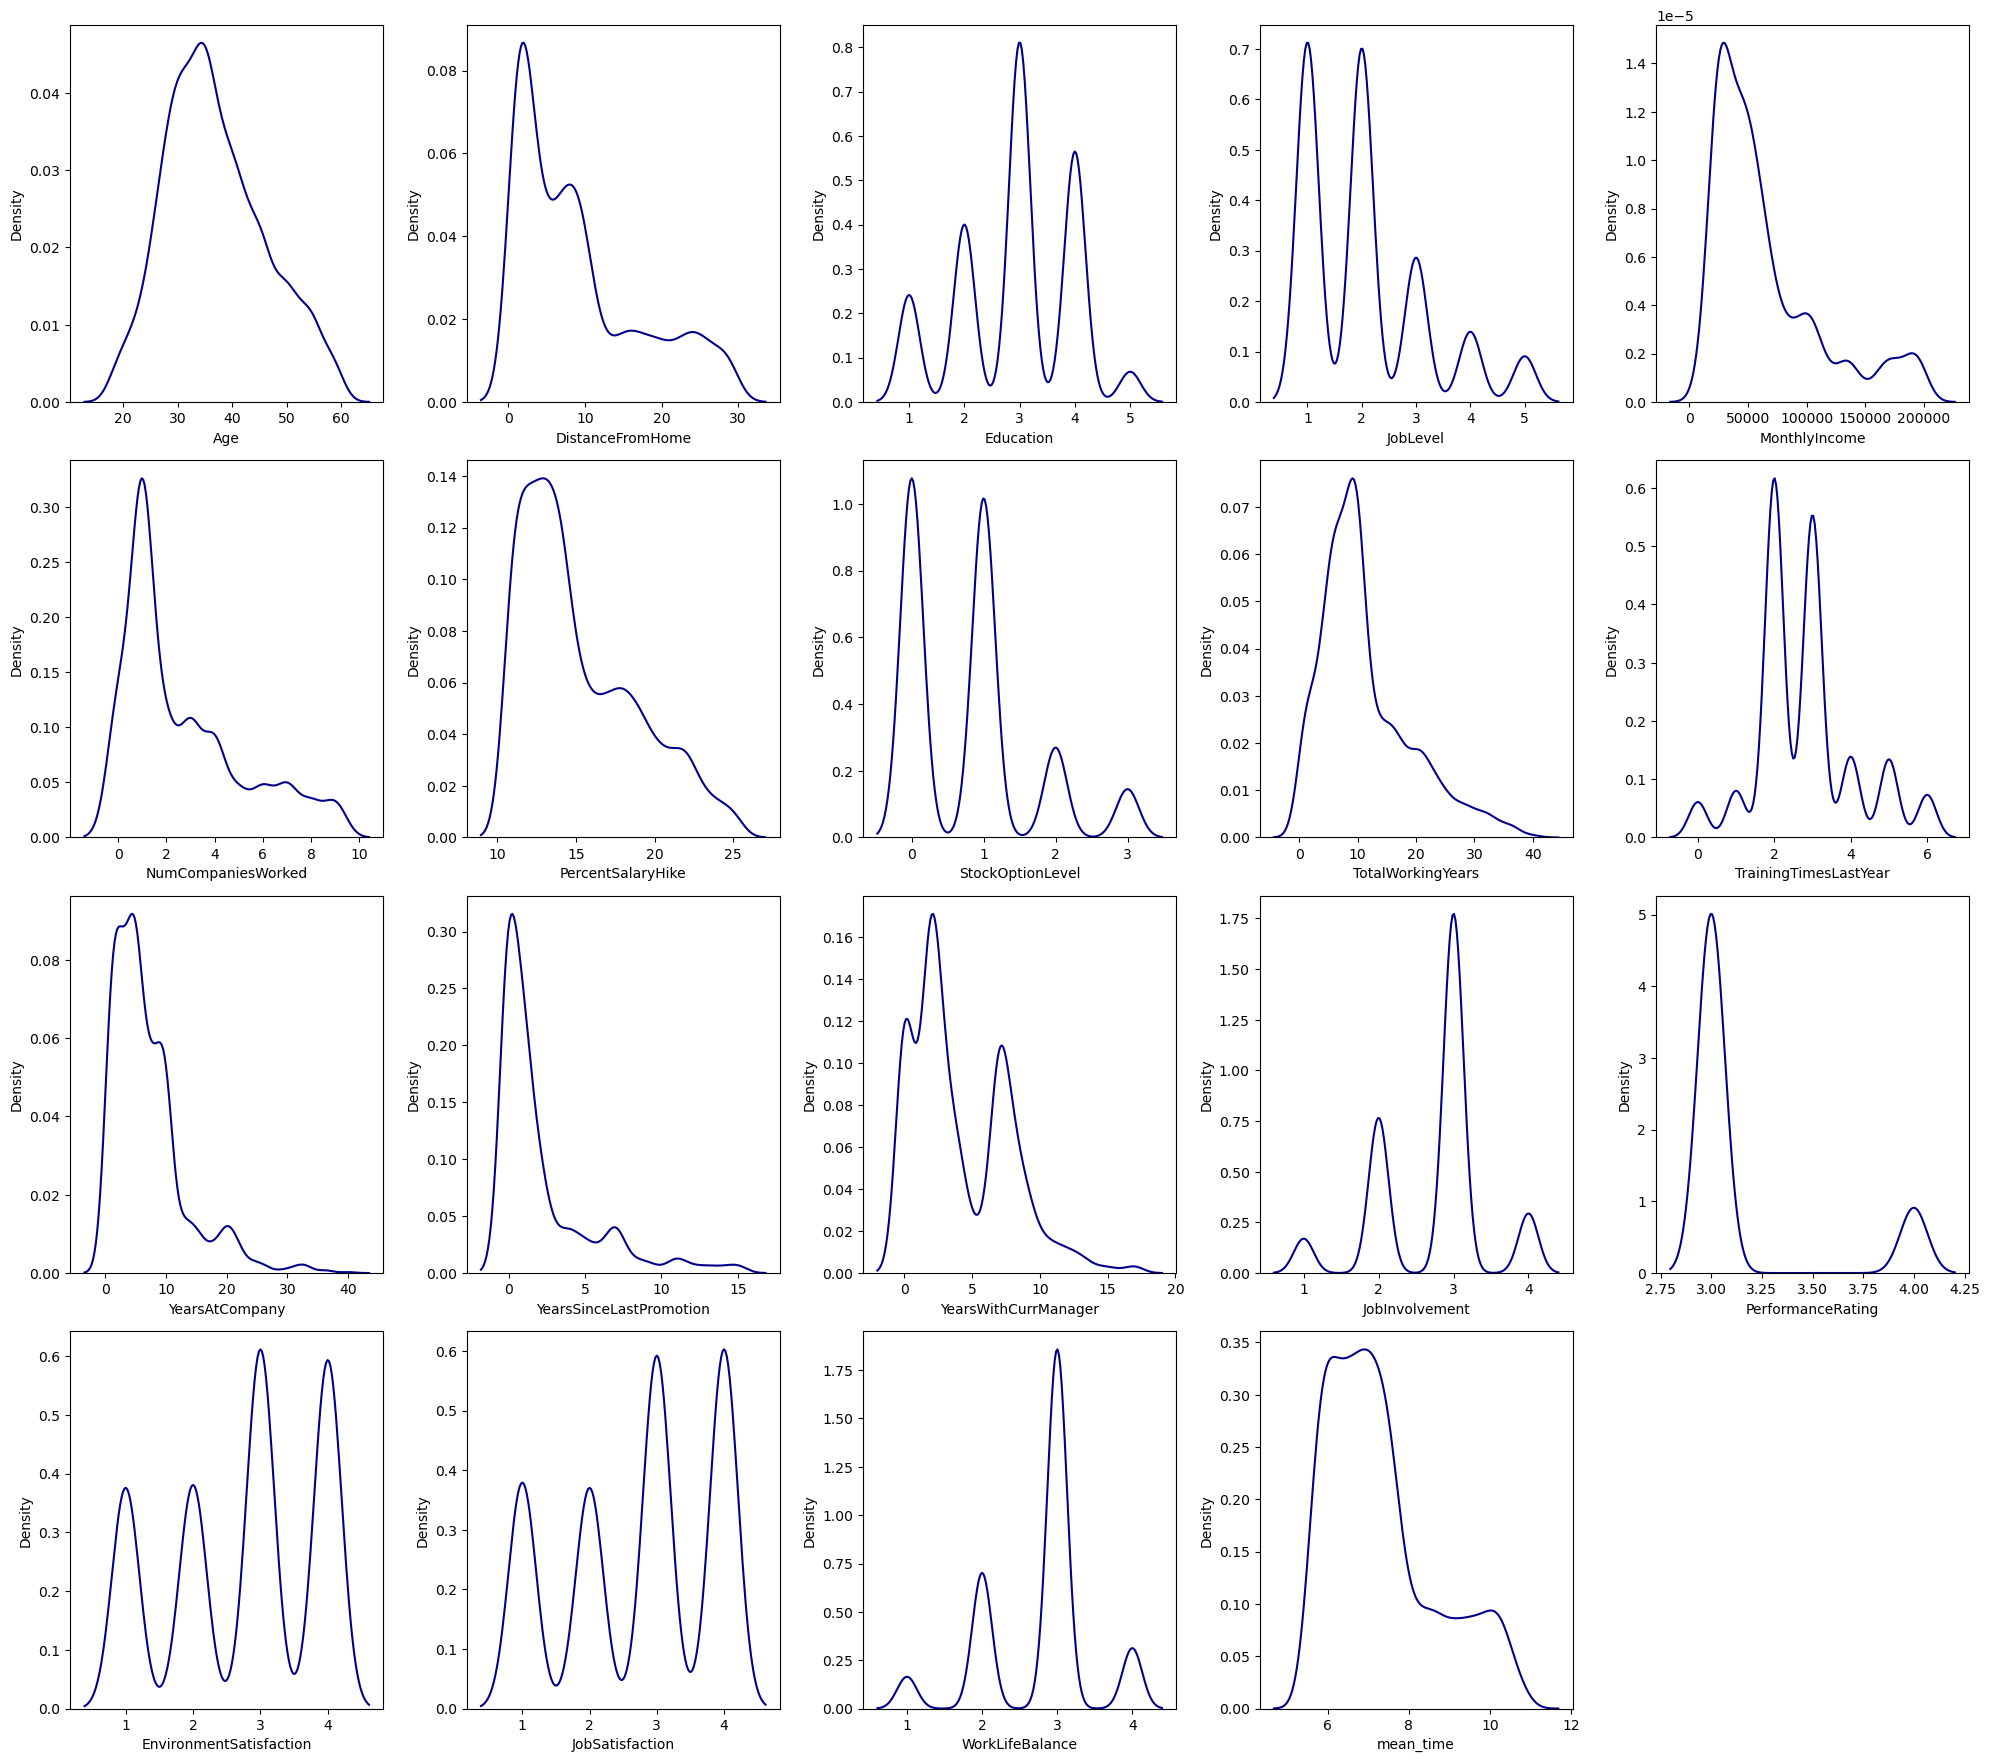

In [59]:
plt.figure(figsize=(20,26))

features = int_cols
for i in range(0, len(features)):
    plt.subplot(6, 5, i+1)
    sns.kdeplot(x=df_data[features[i]], color='darkblue')
    plt.xlabel(features[i])
    plt.tight_layout()


Observation:
1. We can ignore interpreting feature columns with limited discrete values such as `Education`, `JobLevel`, `NumCompaniesWorked`, `StockOptionLevel`, `TrainingTimesLastYear`,`JobInvolvement`, `YearsSinceLastPromotion`, `YearsWithCurrManager`, `PerformanceRating`, `EnvironmentSatisfaction`, `JobSatisfaction`, and `WorkLifeBalance` 


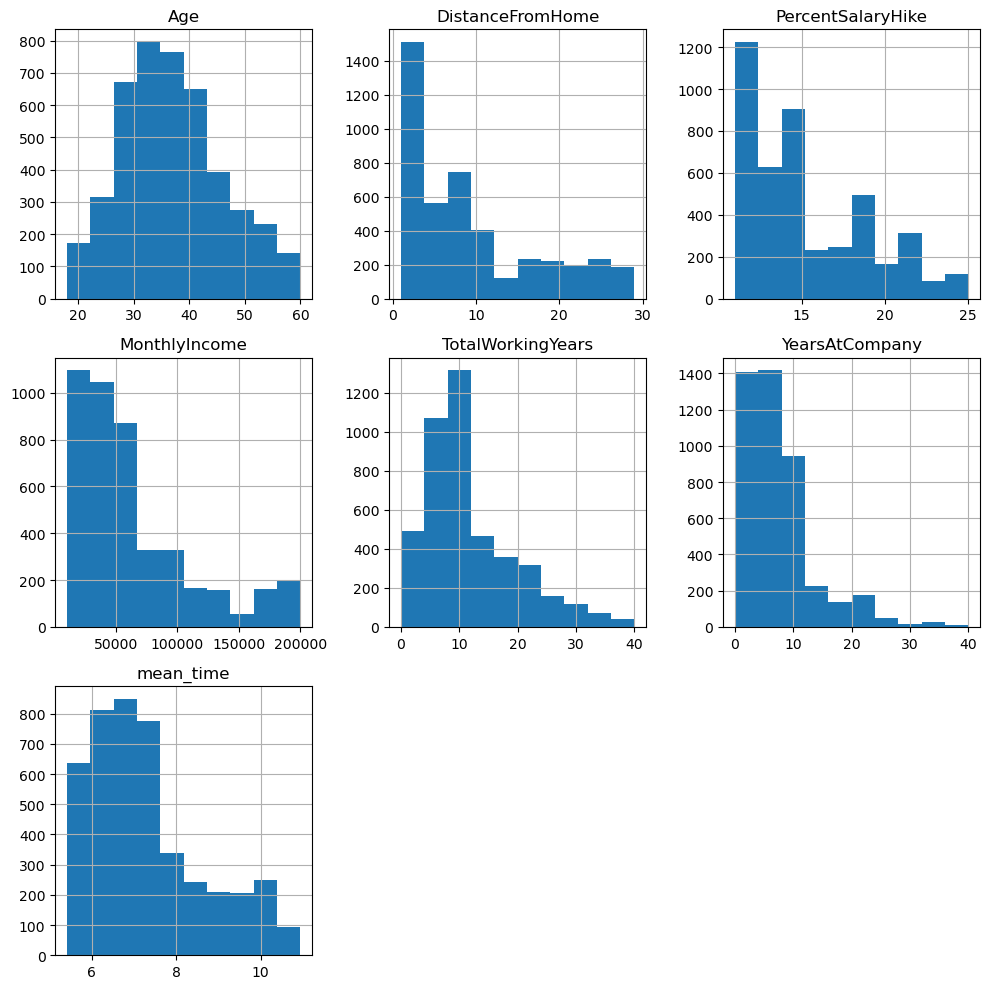

In [58]:
#Divide into NumericalColumns
columns=df_data.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany','mean_time']
#num_col = int_cols
df_data[num_col_eda].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

Observation:
1. Except `age`, most of the Columns are in Skew Distribistion form
2. The true continuous numeric features: `age` is almost symmetric, which  is good (no need to transform them to approximate normal distribution if we later want to do modelling)
3. As logistic regression does not require independent variables to be normal distributed .so i am not changing distribution of features which are skewed into the normal Distribution

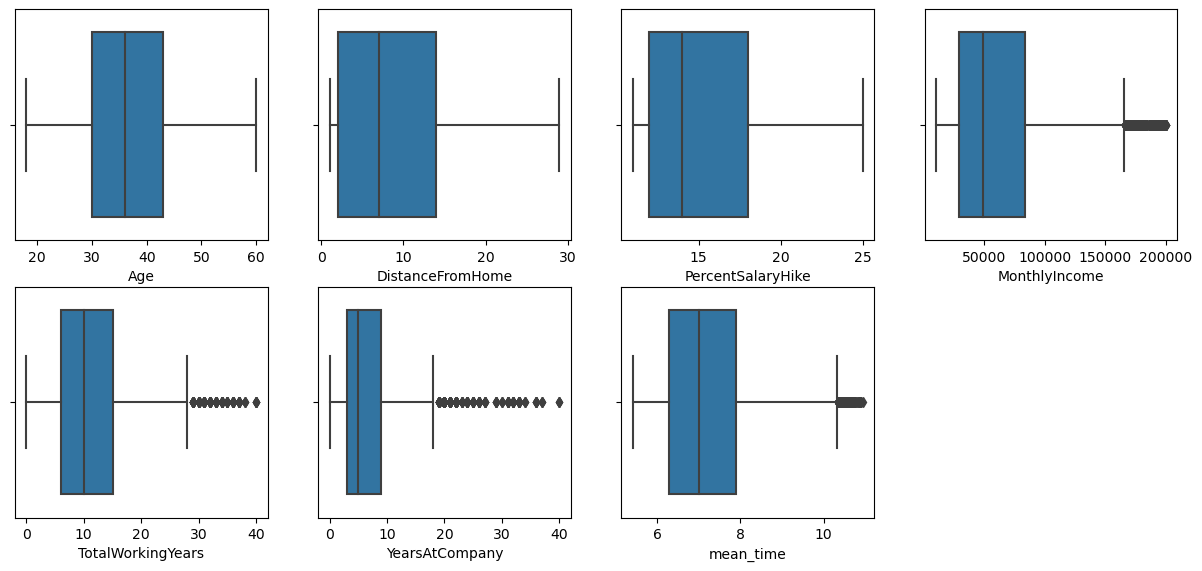

In [61]:
#Box Plot for finding "Outlier" in our data
fig = plt.figure(figsize=(15,21))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=df_data,ax=ax)

Results from Above Graph:<br>
from above BoxPlot ,Trying to find is there any outliers in Numerical columns:
- can Observe outliers on MonthlyIncome , TotalWorkingYears, YearsAtCompany, and mean_time Columns
- from observing on that columns can say those columns some of values not outliers Because there is highly possibilites on occuring those numerical values on those features or columns

### Bivariate analysis

In [59]:
#Divide into CategoricalColumns
num_attrition=num_col_eda+['Attrition']
Education=['Below-College','College','Bachelor','Master','Doctor']
EnvironmentSatisfaction=['Low','Medium','High','Very High']
JobInvolvement=['Low','Medium','High','Very High']
JobSatisfaction=['Low','Medium','High','Very High']
RelationshipSatisfaction=['Low','Medium','High','Very High']
PerformanceRating=['Low','Good','Excellent','Outstanding']
WorkLifeBalance=['Bad','Good','Better','Best']

val=[Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance]
cat1=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance']

cat_col_eda=set(columns) - set(num_col_eda) #set kolom cat_col_eda dikurang dg set kolom yg ada pada num_col_eda
cat_col_eda=set(cat_col_eda) - set(cat1) #set kembali kolom cat_col_eda dikurang dg set kolom yg ada pada cat1
fig = plt.figure(figsize=(16,20))

<Figure size 1600x2000 with 0 Axes>

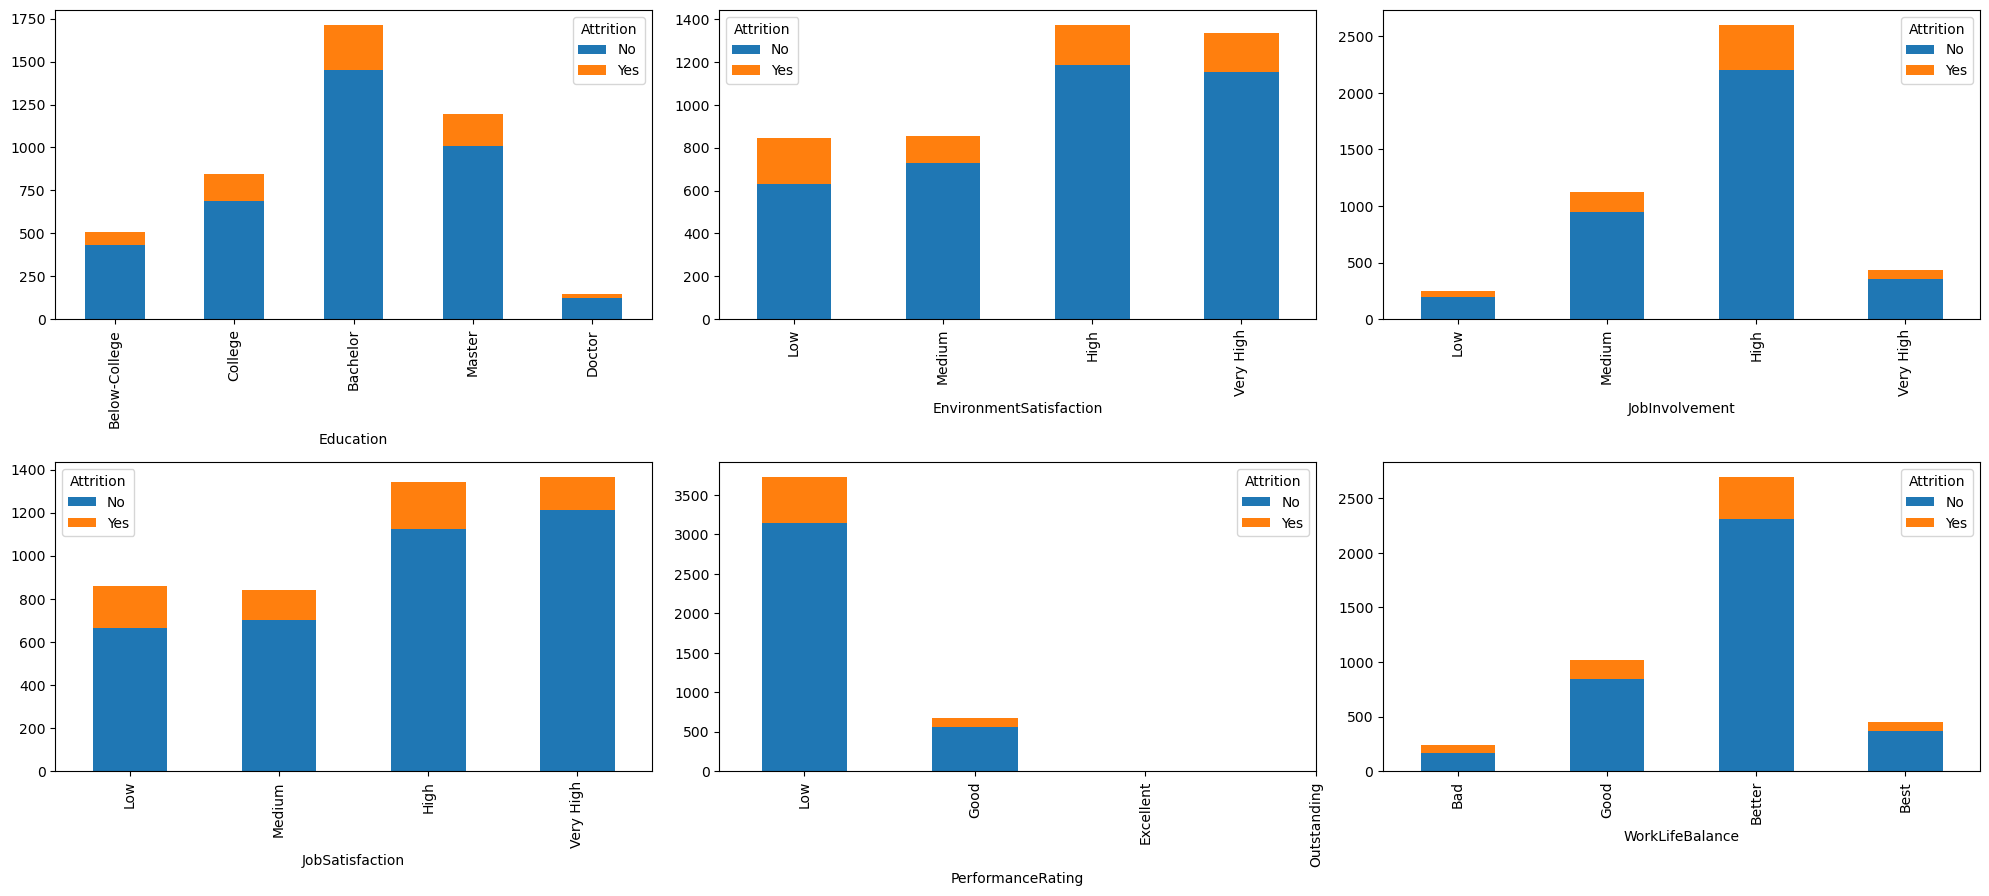

In [61]:
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(zip(cat1,val)):
    crosstab = pd.crosstab(index=df_data[i[0]], columns=df_data["Attrition"])
    ax=plt.subplot(6,3,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.tight_layout()
plt.show()

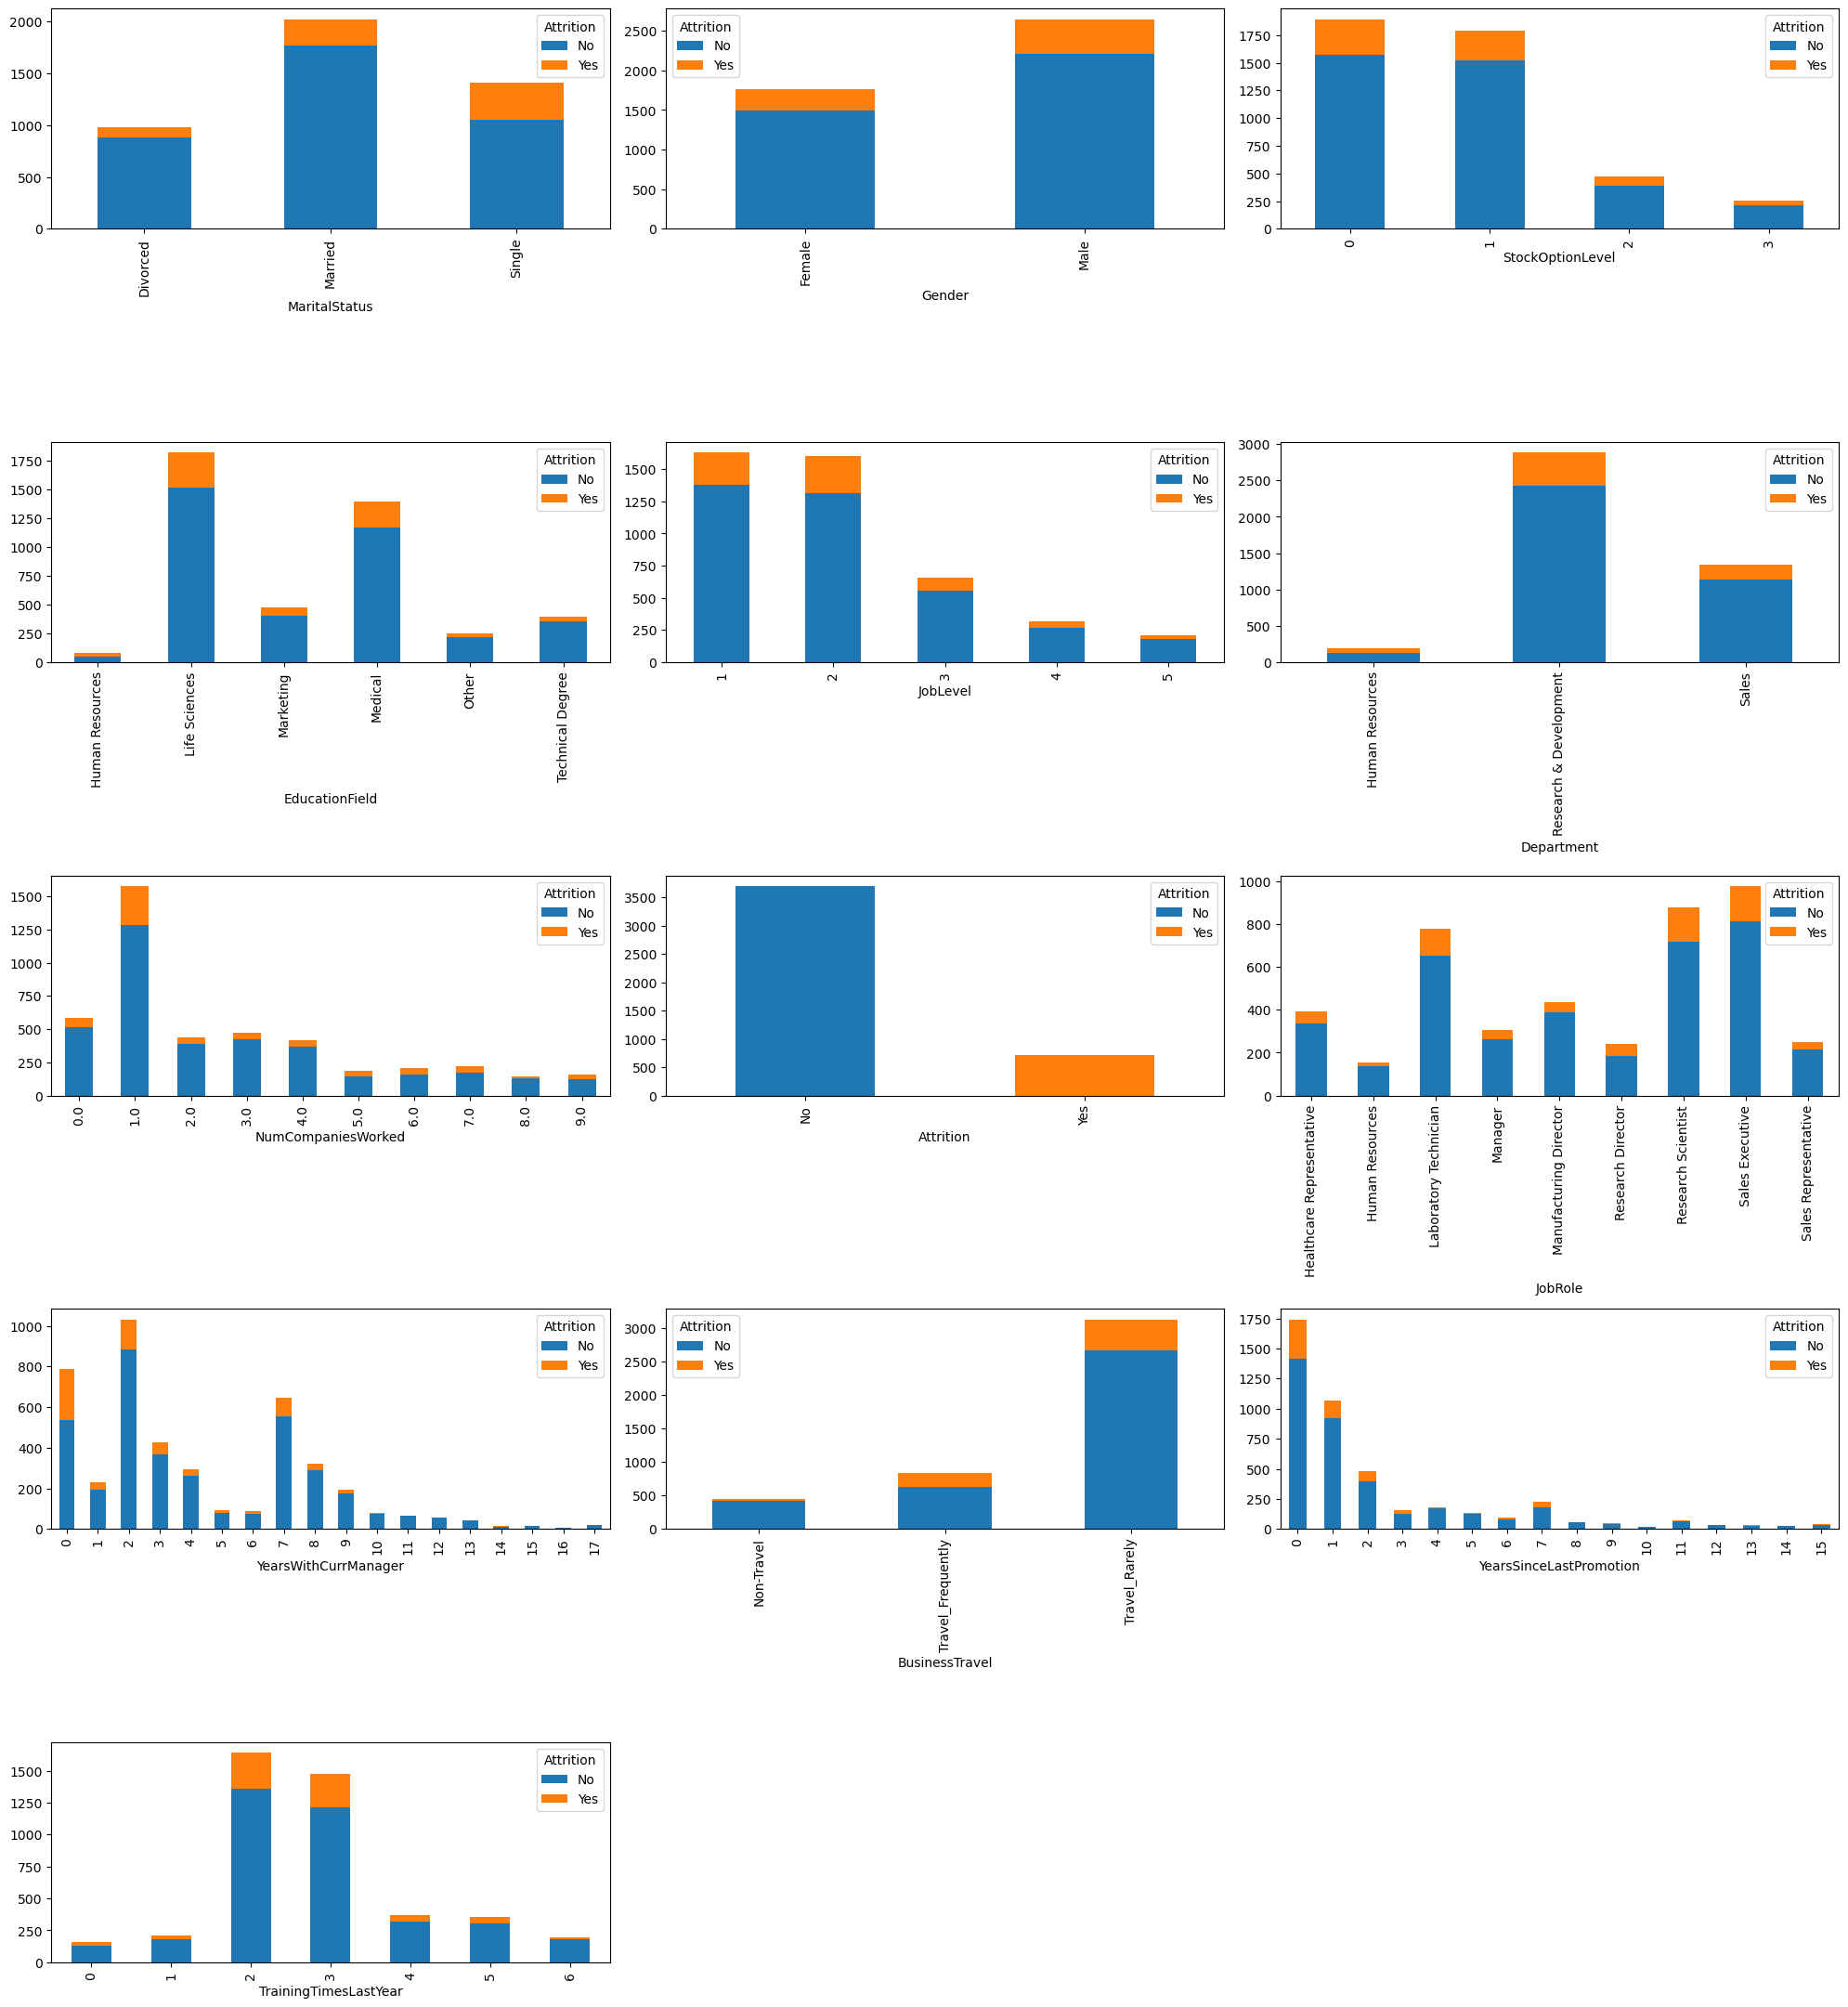

In [62]:
fig = plt.figure(figsize=(20,26))

for idx, i in enumerate(cat_col_eda):
    crosstab = pd.crosstab(index=df_data[i], columns=df_data["Attrition"])
    ax = plt.subplot(6, 3, idx + 1)
    crosstab.plot(kind="bar", stacked=True, ax=ax)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Tambahkan rotasi pada label kategori
plt.tight_layout()
plt.show()

### Multivariate analysis

In [107]:
df_copy = df_data.copy()

In [65]:
df_copy.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.687528,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.725170,2.729478,2.763492,7.314363
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.495967,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.089852,1.098904,0.703541,1.330769
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.416880
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.279408
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011174
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.900785
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


In [108]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

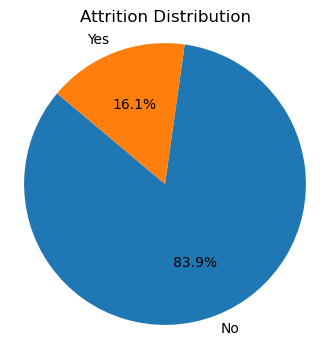

In [67]:
# Hitung jumlah data untuk setiap jenis kelamin
attrition_counts = df_copy['Attrition'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Distribution')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle
plt.show()

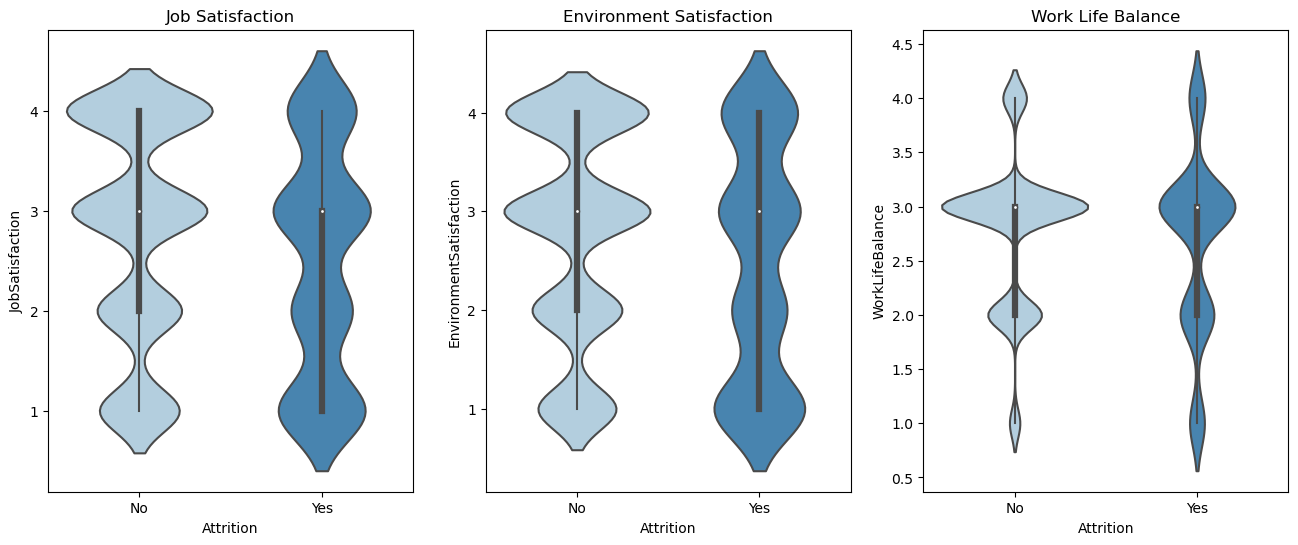

In [71]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.violinplot(data=df_copy, x='Attrition', y='JobSatisfaction', palette='Blues')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=df_copy, x='Attrition', y='EnvironmentSatisfaction', palette='Blues')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=df_copy, x='Attrition', y='WorkLifeBalance', palette='Blues')
plt.title('Work Life Balance')

plt.show()

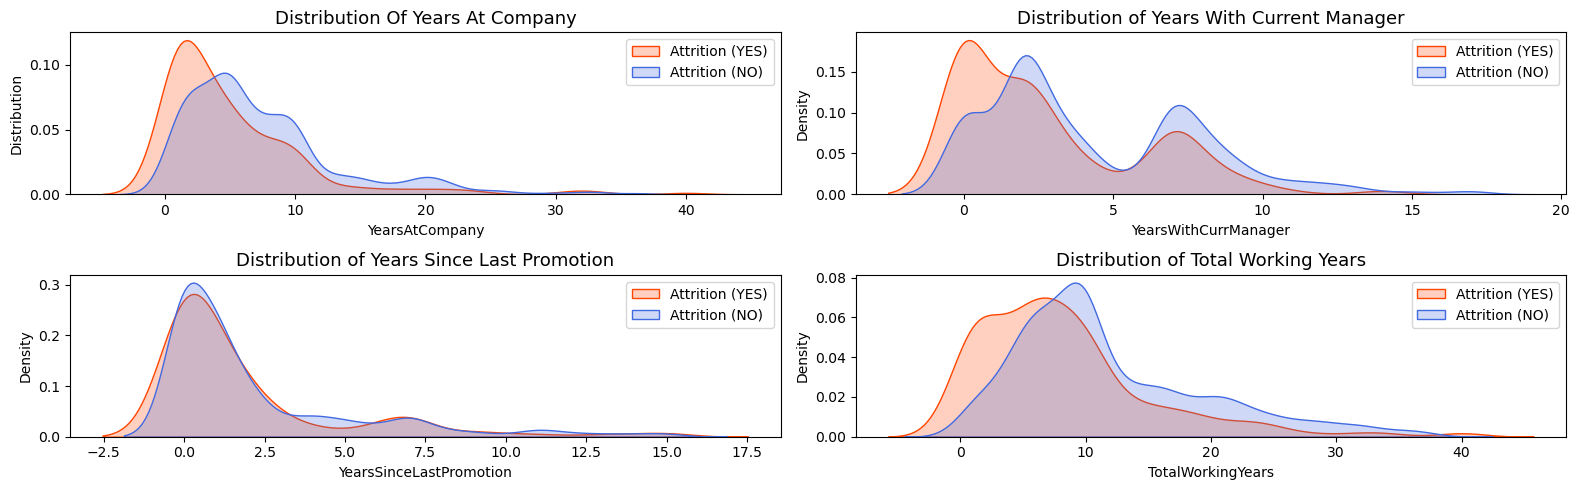

In [88]:
plt.figure(figsize=(16,5))

plt.subplot(2,2,1)
sns.kdeplot(df_copy['YearsAtCompany'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['YearsAtCompany'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution Of Years At Company', fontsize=13)
plt.ylabel('Distribution')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(2,2,2)
sns.kdeplot(df_copy['YearsWithCurrManager'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['YearsWithCurrManager'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Years With Current Manager', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(2,2,3)
sns.kdeplot(df_copy['YearsSinceLastPromotion'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['YearsSinceLastPromotion'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Years Since Last Promotion', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(2,2,4)
sns.kdeplot(df_copy['TotalWorkingYears'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['TotalWorkingYears'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Total Working Years', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.tight_layout()
plt.show()


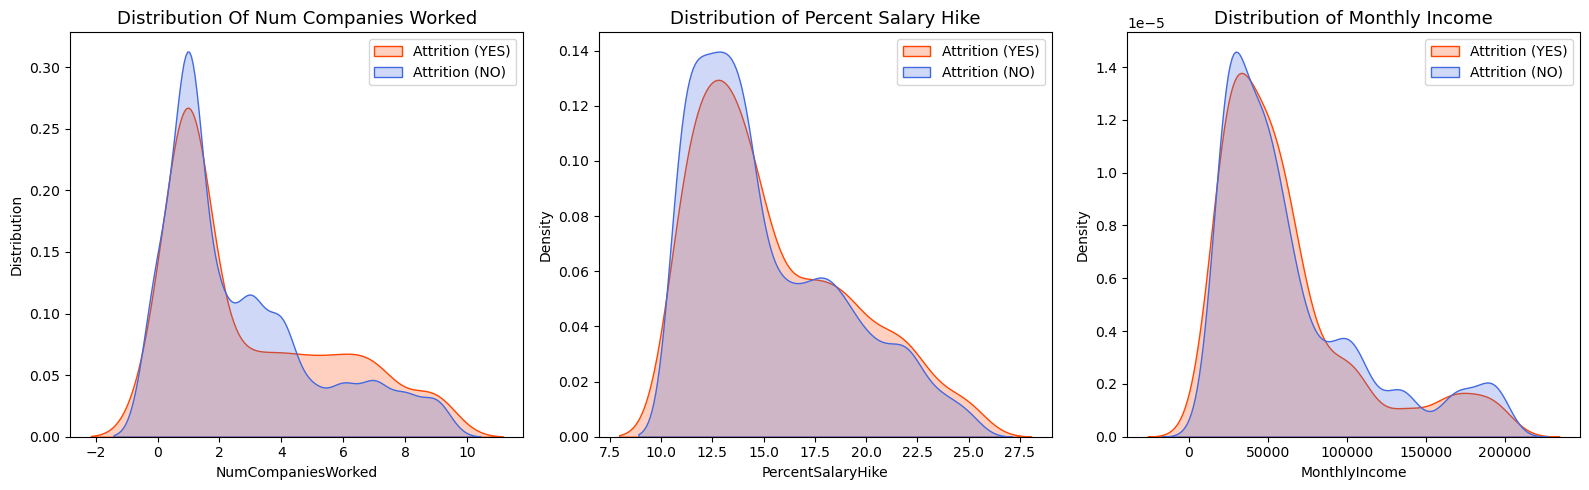

In [102]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.kdeplot(df_copy['NumCompaniesWorked'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['NumCompaniesWorked'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution Of Num Companies Worked', fontsize=13)
plt.ylabel('Distribution')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,2)
sns.kdeplot(df_copy['PercentSalaryHike'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['PercentSalaryHike'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Percent Salary Hike', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,3)
sns.kdeplot(df_copy['MonthlyIncome'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['MonthlyIncome'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Monthly Income', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.tight_layout()
plt.show()


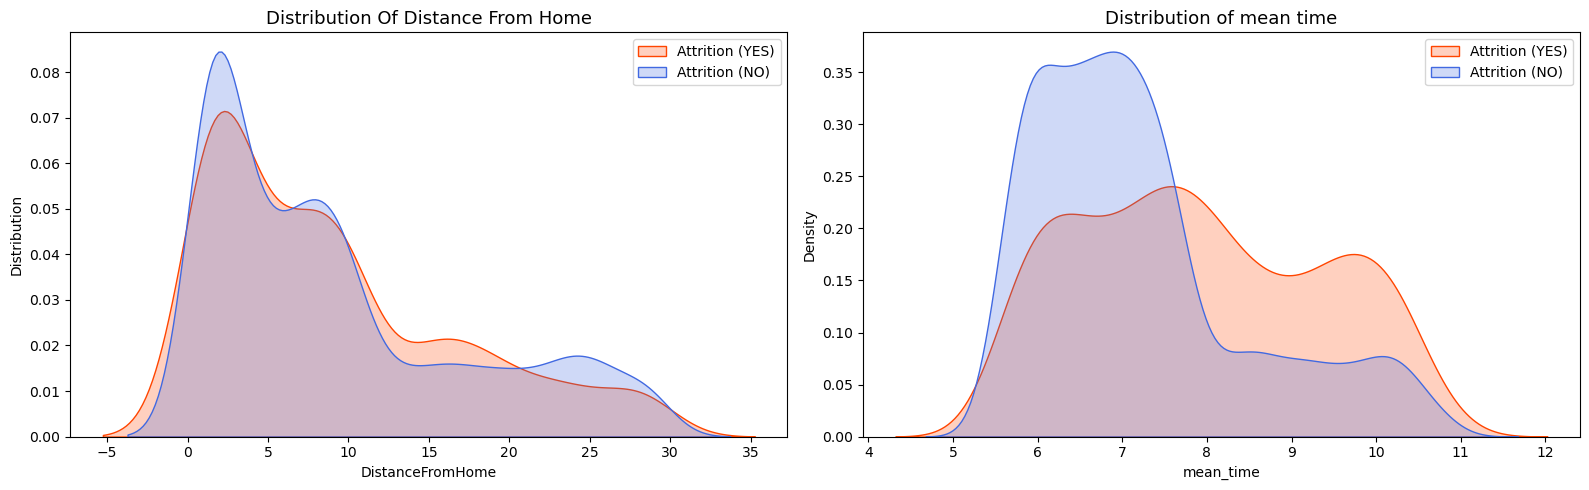

In [103]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(df_copy['DistanceFromHome'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['DistanceFromHome'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution Of Distance From Home', fontsize=13)
plt.ylabel('Distribution')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,2,2)
sns.kdeplot(df_copy['mean_time'][df_copy.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(df_copy['mean_time'][df_copy.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of mean time', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.tight_layout()
plt.show()


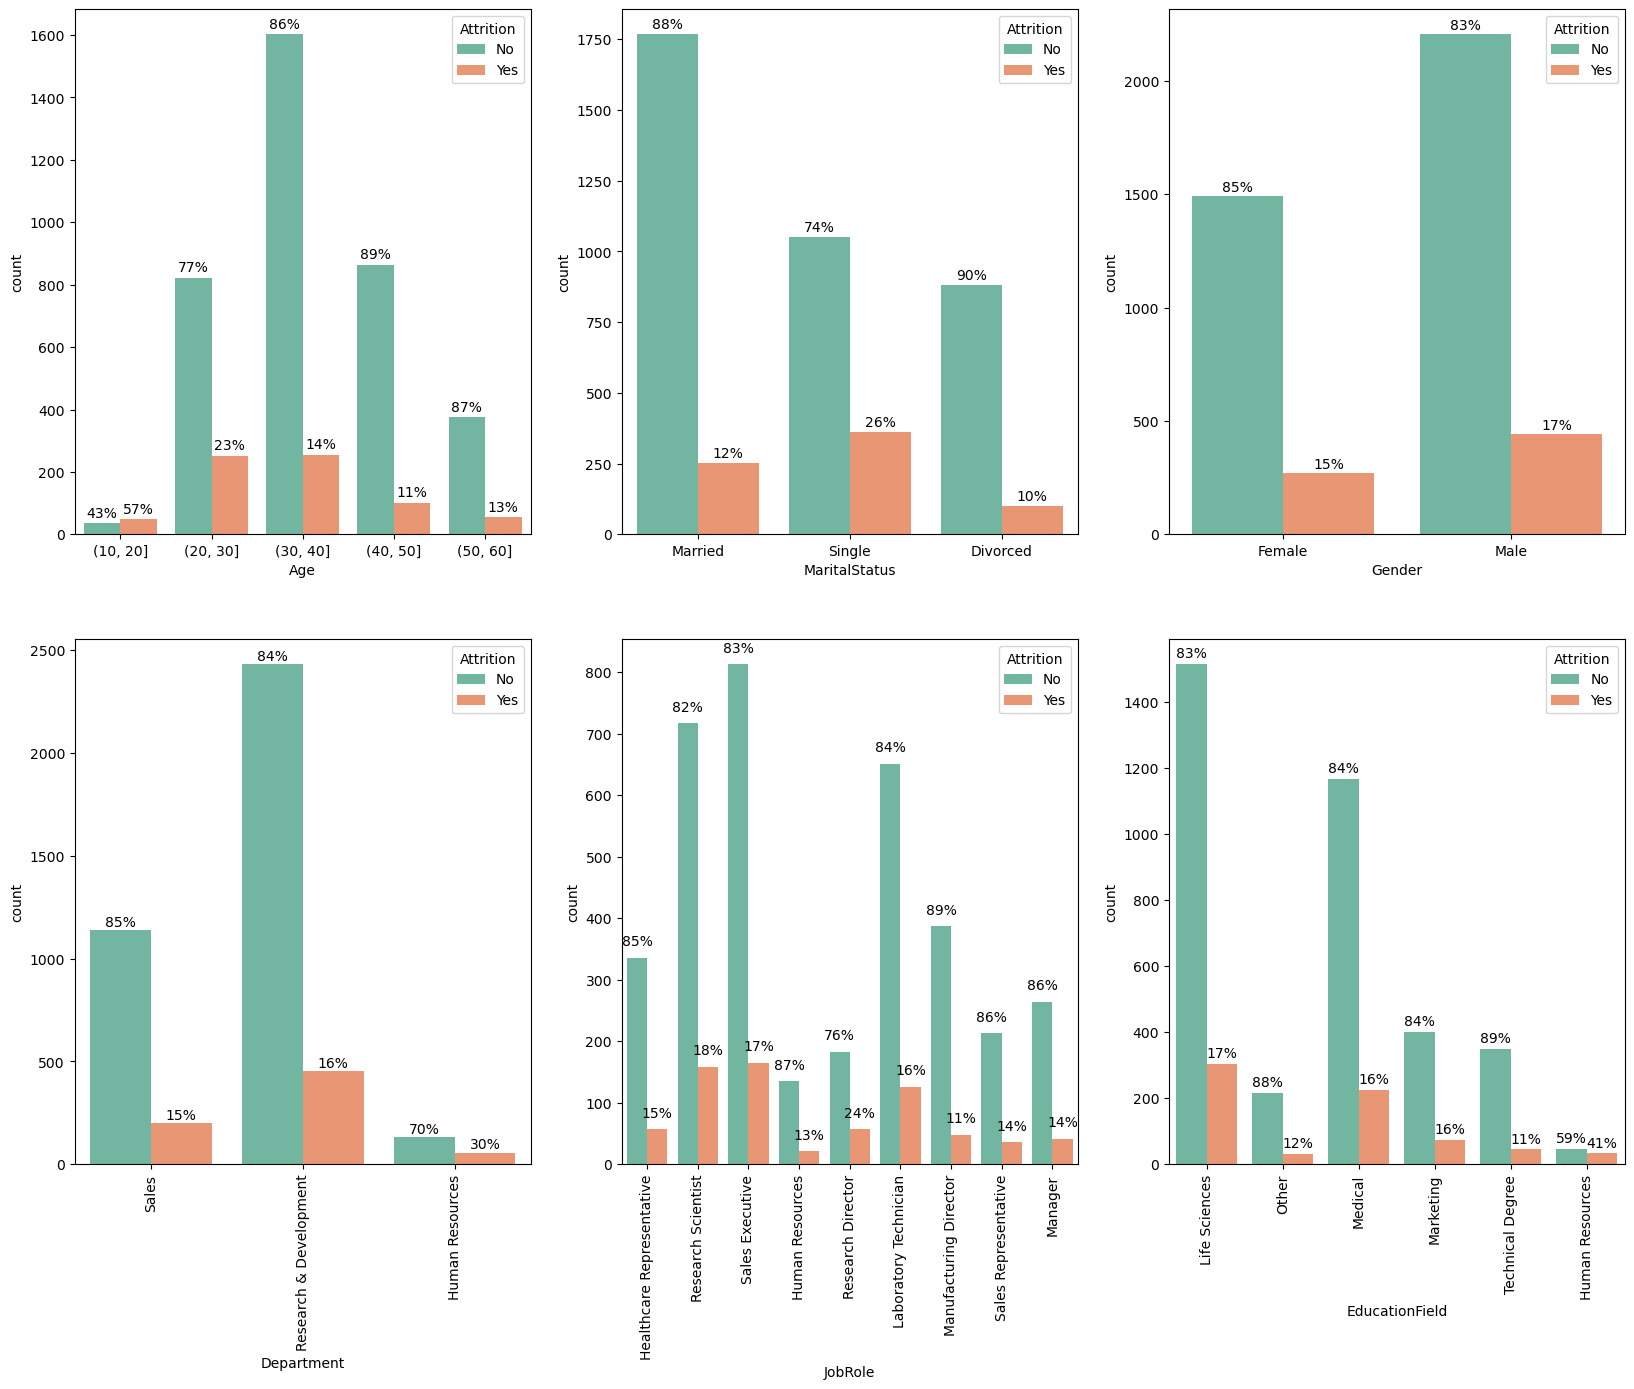

In [101]:
graphs = ['Age', 'MaritalStatus', 'Gender', 'Department', 'JobRole', 'EducationField']
plt.figure(figsize=(20,15))
for index, item in enumerate(graphs):
    plt.subplot(2,3,index+1)
    ax = sns.countplot(x=item, hue='Attrition', data=df_copy, palette='Set2')
    if index+1>3: plt.xticks(rotation=90)
    index = int(len(ax.patches)/2)
    for left,right in zip(ax.patches[:index], ax.patches[index:]):
        left_height = left.get_height()
        right_height = right.get_height()
        total = left_height + right_height
        ax.text(left.get_x() + left.get_width()/2., left_height + 20, '{:.0%}'.format(left_height/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., right_height + 20, '{:.0%}'.format(right_height/total), ha="center")
plt.show()  


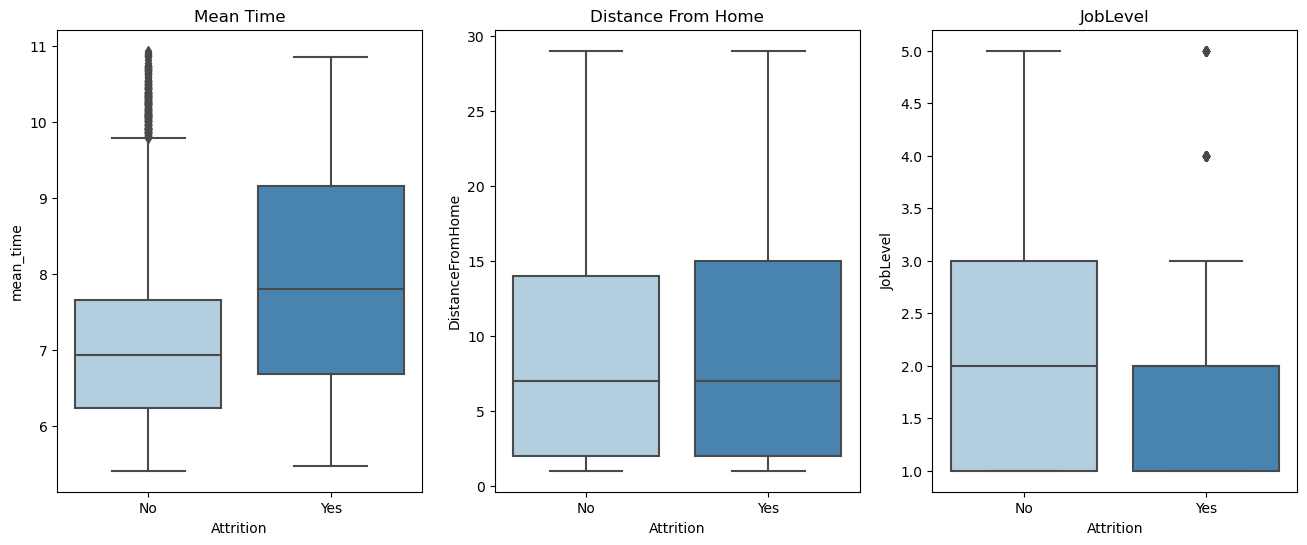

In [120]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_copy, x='Attrition', y='mean_time', palette='Blues')
plt.title('Mean Time')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_copy, x='Attrition', y='DistanceFromHome', palette='Blues')
plt.title('Distance From Home')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_copy, x='Attrition', y='JobLevel', palette='Blues')
plt.title('JobLevel')

plt.show()


In [69]:
def make_plot(feature_name, x_ticks = 'not_needed'):
   
    
    # Initialize a figure
    plt.figure(figsize = (18,7))
    
    # Generate a countplot for the passed feature_name
    ax = sns.countplot(x=feature_name, hue='Attrition', data=df_copy, palette='Set2')
    
    # Check if custom x_tick is needed or not
    if x_ticks != 'not_needed':
        # Generate index of xticks
        ticks_index = [i for i in range(len(x_ticks))]
        
        # set new xticks by passing ticks_index and custom xtick labels 
        ax.set(xticks=ticks_index, xticklabels=x_ticks)
        
    # set title, xlabel, ylabel, legend
    plt.xlabel(feature_name,fontsize  = 14)
    plt.ylabel('Employee Count',fontsize  = 14)
    plt.title('{} vs Attrition'.format(feature_name), fontsize = 18)
    plt.legend(fontsize = 14)

    # From axis.patches get bar lengths
    get_bars = ax.patches
    half_bar_length = int(len(get_bars)/2)
    bar_left = get_bars[:half_bar_length]
    bar_right = get_bars[half_bar_length:]
    
    # Place %employees on top of each bar
    for L, R in zip(bar_left, bar_right):
        left_height = L.get_height()
        right_height = R.get_height()
        length_total = left_height + right_height

        # place calculated employee percentage on top of each bar
        ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
        ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")

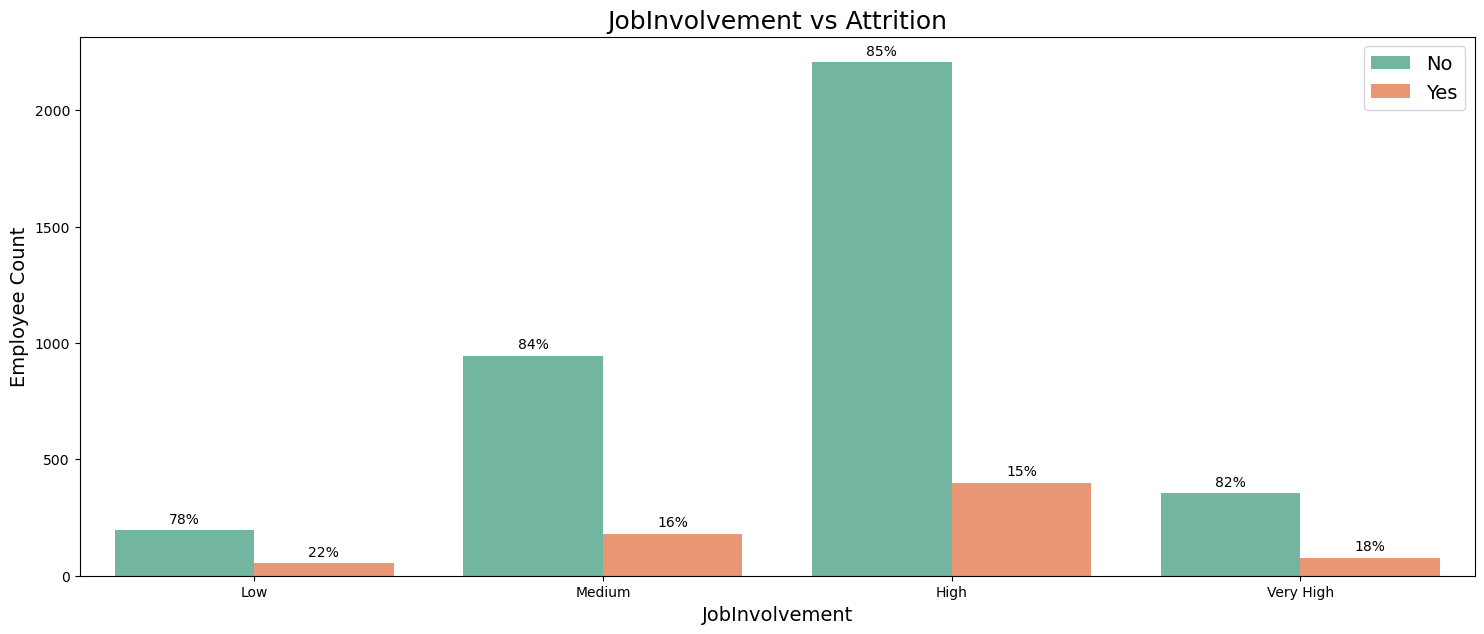

In [382]:
make_plot('JobInvolvement',['Low','Medium','High','Very High'])

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_plot2(feature_name, x_ticks='not_needed'):
   
    # Initialize a figure
    plt.figure(figsize=(18, 7))
    
    # Generate a countplot for the passed feature_name
    ax = sns.countplot(x=feature_name, hue='Attrition', data=df_copy, palette='tab10')
    
    # Check if custom x_tick is needed or not
    if x_ticks != 'not_needed':
        # Generate index of xticks
        ticks_index = [i for i in range(len(x_ticks))]
        
        # set new xticks by passing ticks_index and custom xtick labels 
        ax.set(xticks=ticks_index, xticklabels=x_ticks)
        
    # set title, xlabel, ylabel, legend
    plt.xlabel(feature_name, fontsize=14)
    plt.ylabel('Employee Count', fontsize=14)
    plt.title('{} vs Attrition'.format(feature_name), fontsize=18)
    plt.legend(fontsize=14)

    # Iterate through each pair of bars (Yes and No) for each category
    for bars in ax.containers:
        total = sum(bar.get_height() for bar in bars)
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 30, '{:.0%}'.format(height/total), ha="center")


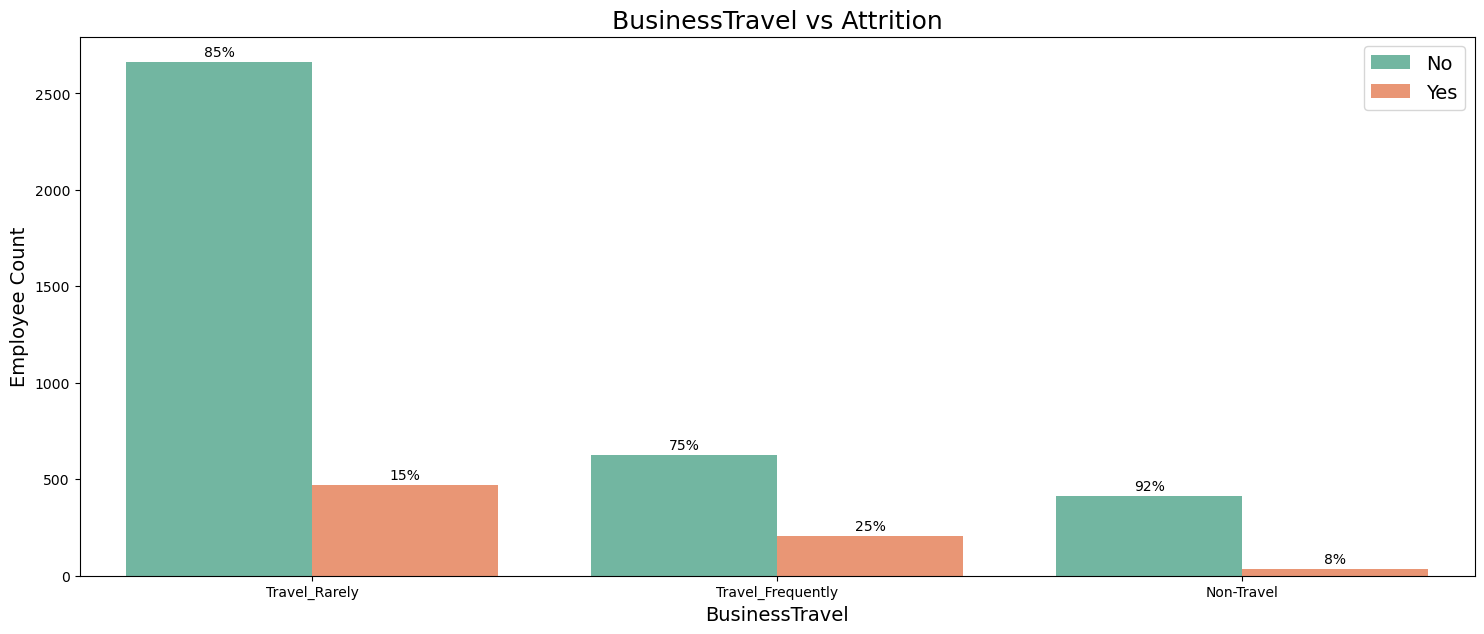

In [135]:
make_plot('BusinessTravel')

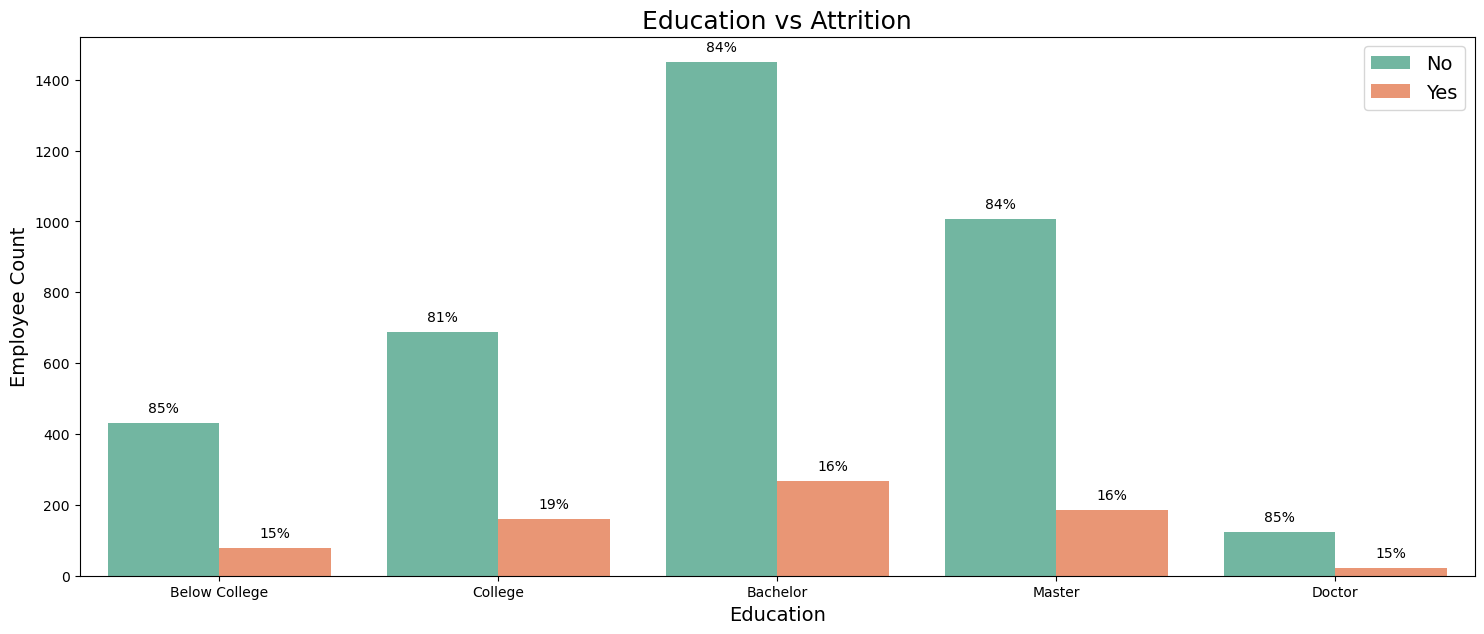

In [74]:
make_plot('Education',['Below College','College','Bachelor','Master','Doctor']) # pass custom xticks as per data dictionary

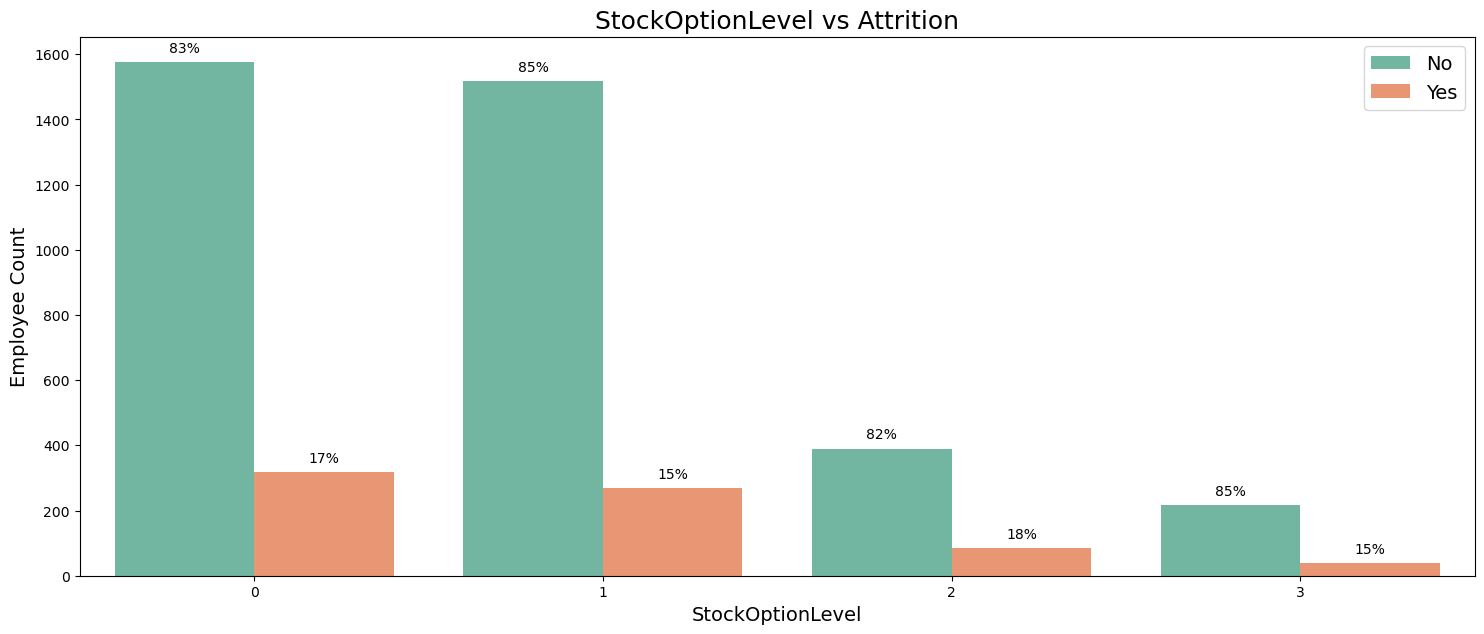

In [414]:
make_plot('StockOptionLevel')

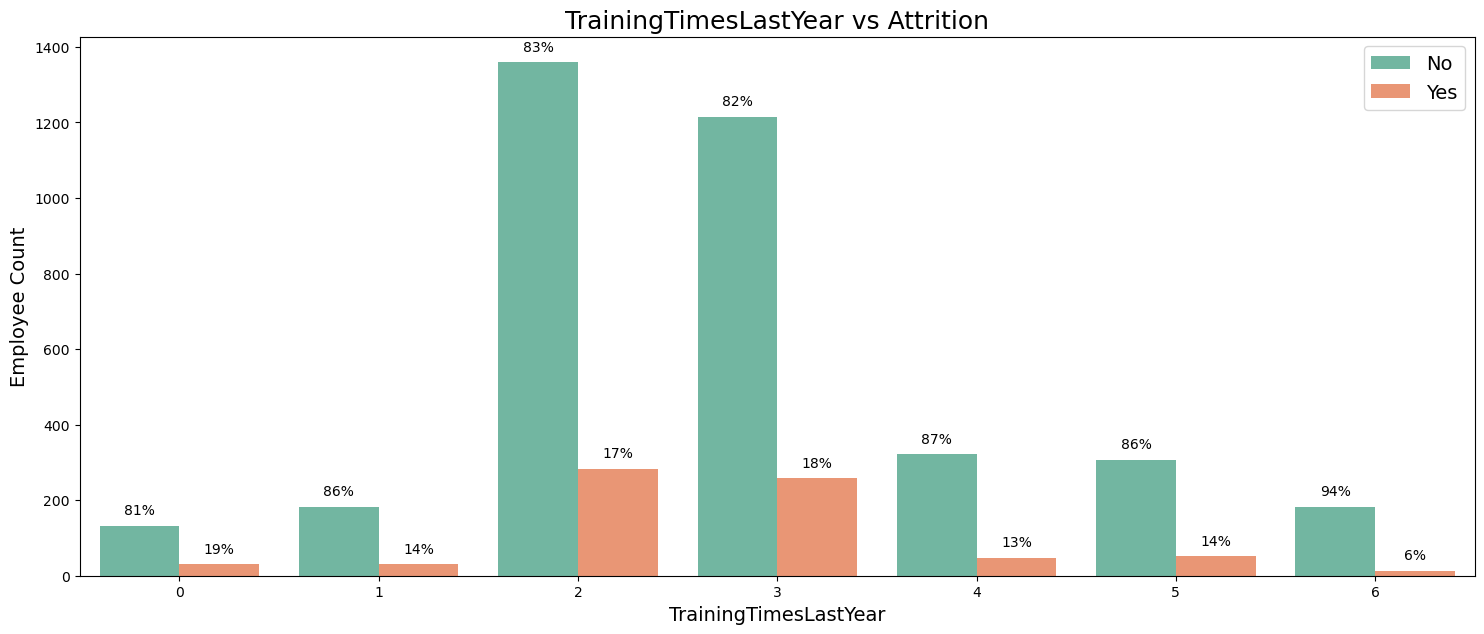

In [416]:
make_plot('TrainingTimesLastYear')

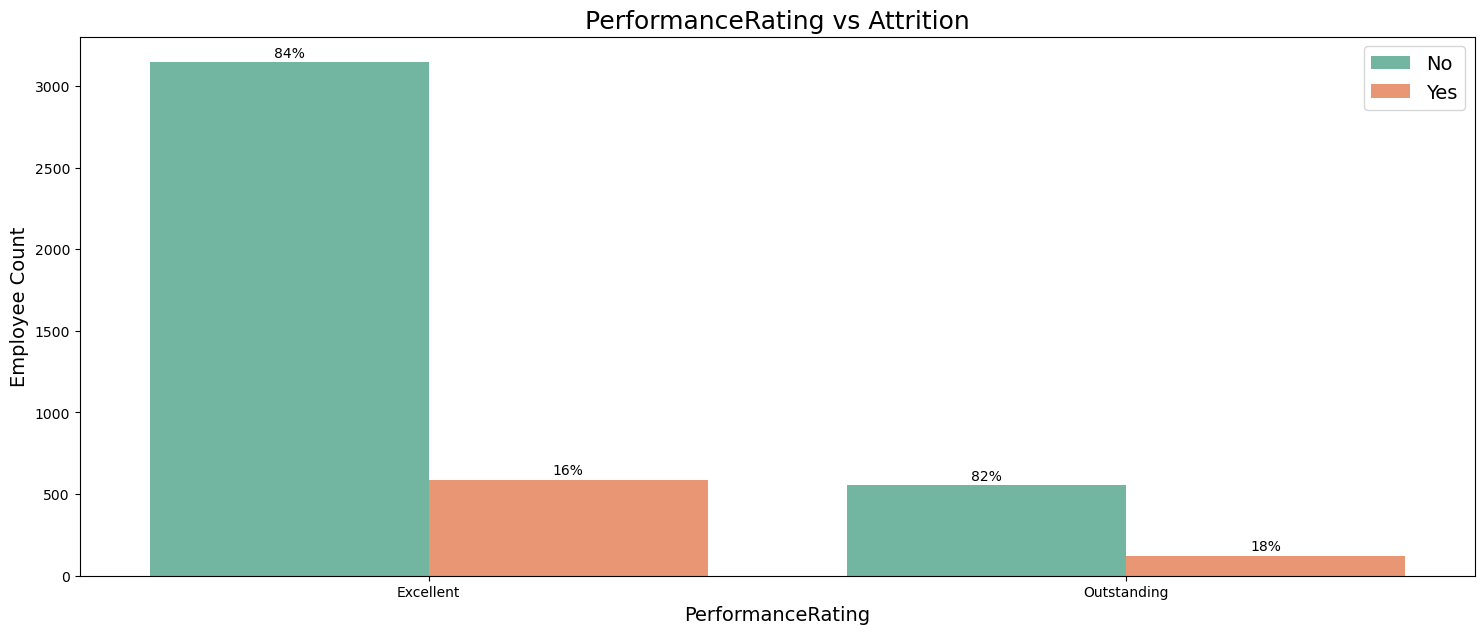

In [422]:
make_plot('PerformanceRating',['Excellent','Outstanding'])

### Finding Coorelation
##### Corelation on Numerical Features

<Axes: >

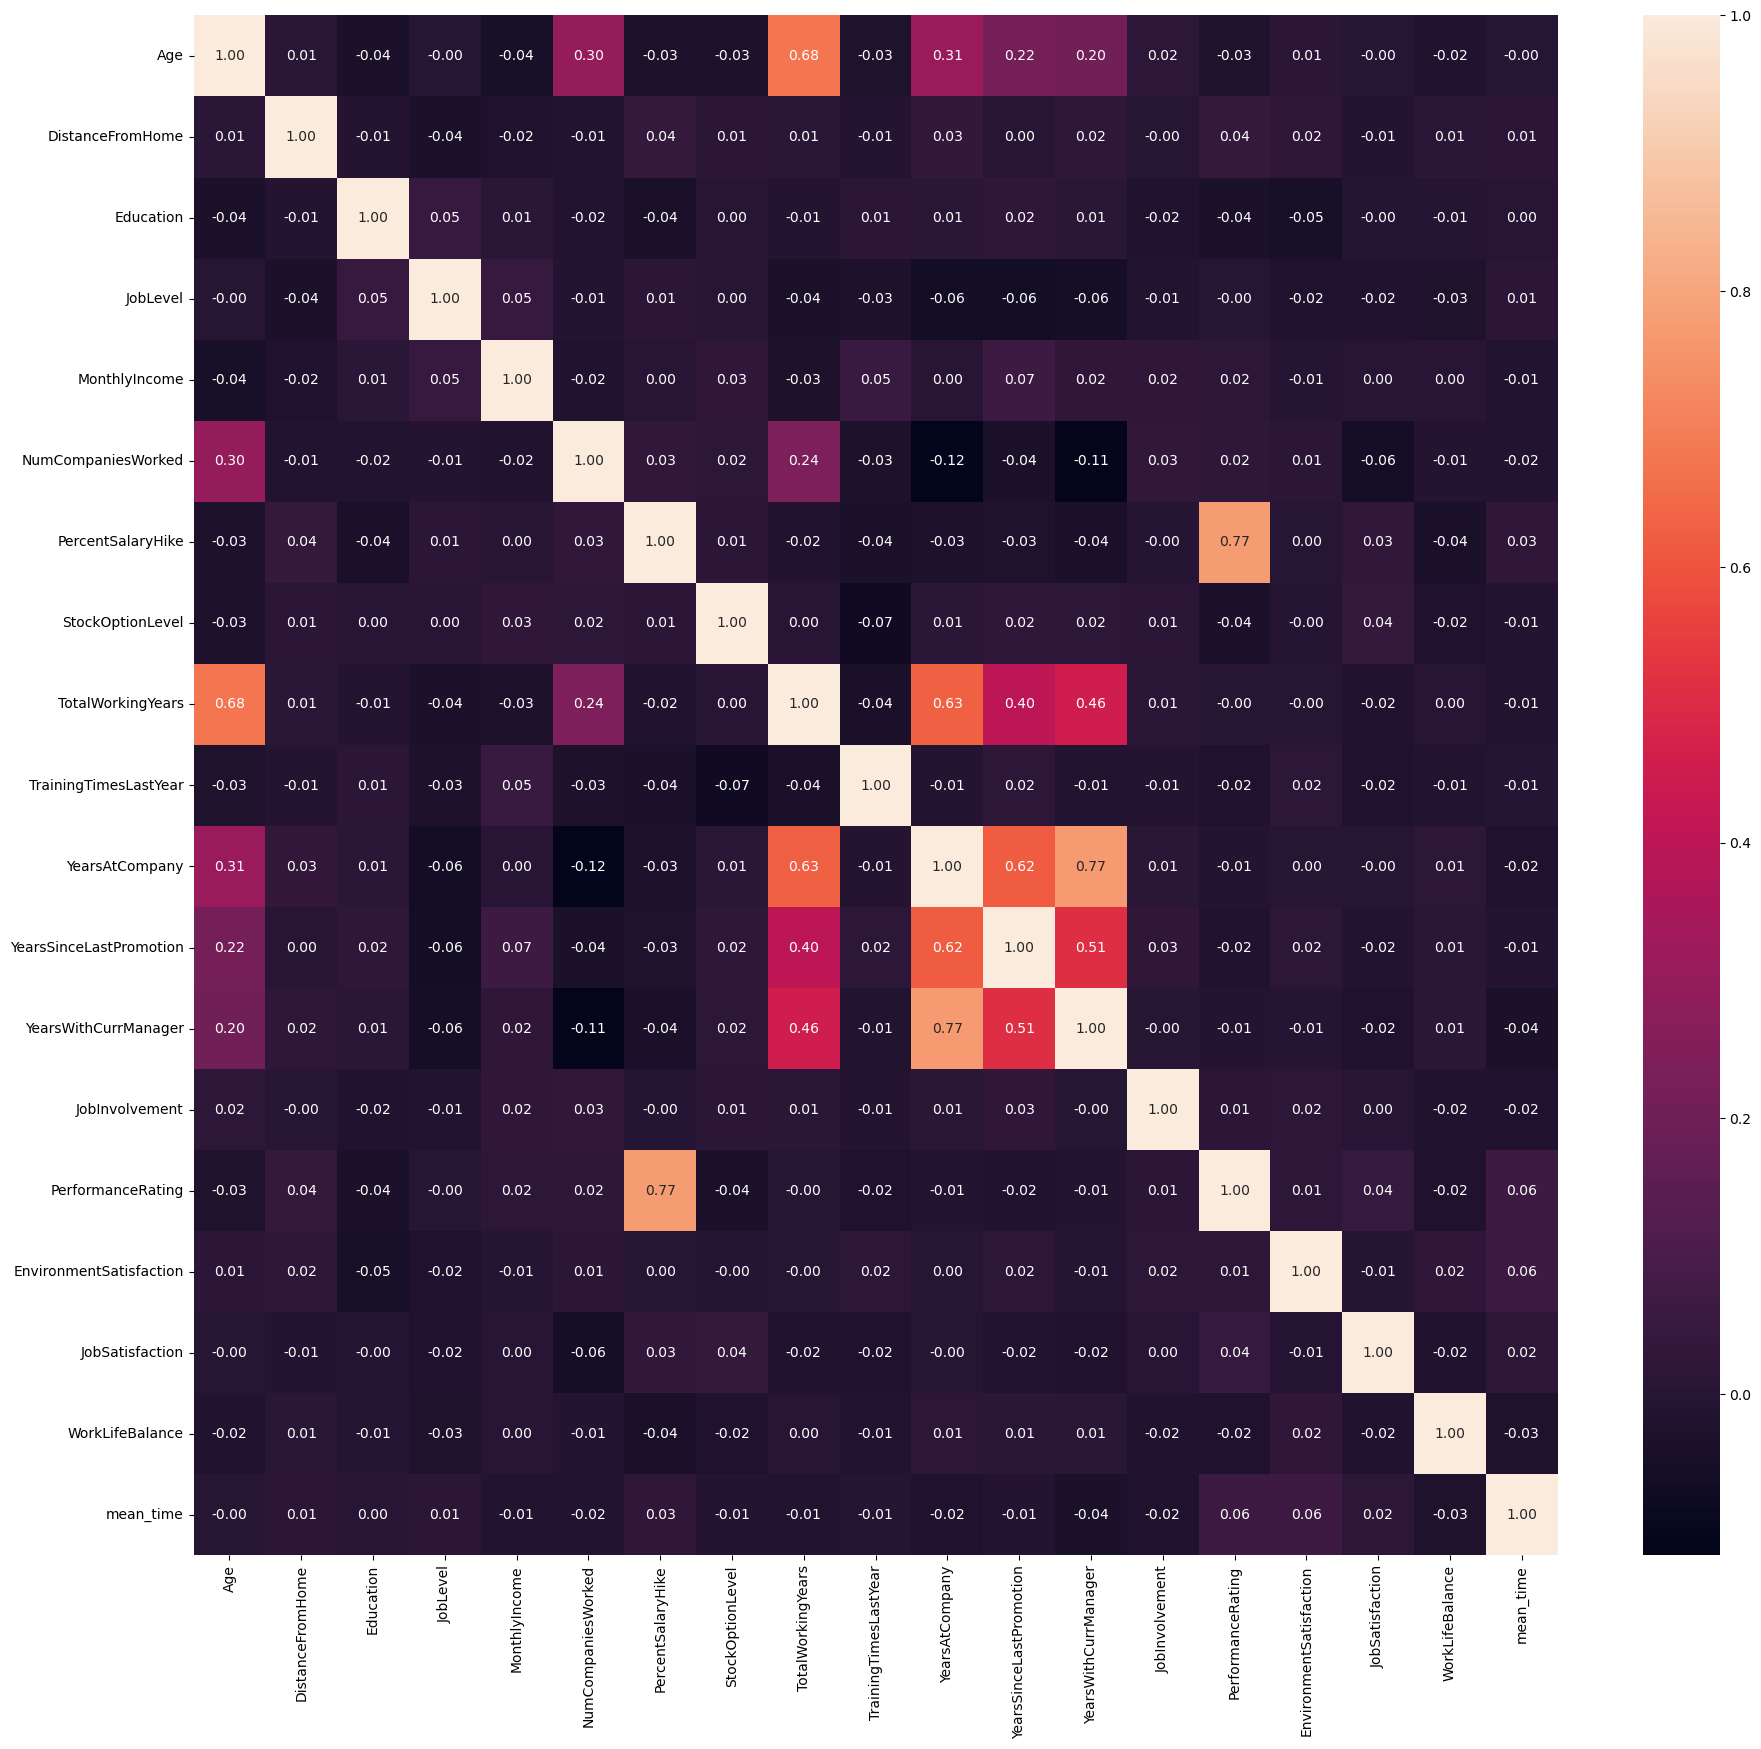

In [134]:
# correlation heatmap
plt.figure(figsize=(22,20))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
- There is no higher dependency between column to columns from above heatMap Plot

# 4)Modeling

### Encoding

In [158]:
df_encode = df_data.copy()

In [159]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [160]:
obj_cols = df_encode.select_dtypes(include = ['object']).columns

for column in obj_cols:
    unique_values = len(df_encode[column].value_counts())
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column Attrition: 2
Unique values in column BusinessTravel: 3
Unique values in column Department: 3
Unique values in column EducationField: 6
Unique values in column Gender: 2
Unique values in column JobRole: 9
Unique values in column MaritalStatus: 3


In [161]:
# encoding categorical variable
one_hot_var = ['BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']
for i in one_hot_var:
    x_t = pd.get_dummies(df_encode[i], prefix=i, prefix_sep='_', drop_first=True) 
    df_encode = df_encode.join(x_t)
    df_encode.drop(i, axis = 1, inplace = True)

In [162]:
# encoding target variable
df_encode.Attrition=df_encode.Attrition.apply(lambda x : 1 if x=='Yes' else 0)
df_encode.Gender=df_encode.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [163]:
df_encode.head(3)

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [191]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   Gender                             4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StockOptionLevel                   4410 non-null   int64  
 10  TotalWorkingYears                  4410 non-null   float64
 11  TrainingTimesLastYear              4410 non-null   int64

In [165]:
df_encode.head(3)

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


### Feature + Target


In [166]:
df_split = df_encode.copy()

In [167]:
X = df_split.drop('Attrition', axis = 1)
y = df_split['Attrition']

### Scaling/standarisasi

Tahap ini dilakukan sebelum proses klasifikasi untuk mempertahankan distribusi nilai pada data.

scaler = StandardScaler()
scaler.fit(X = df_split.drop('Attrition', axis = 1))
X = scaler.transform(X = data_outlier.drop('Attrition', axis = 1))

data_scaler = pd.DataFrame(X, columns=Attrition.columns[:-1])
data_scaler.head()

In [192]:
df_split.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,1,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [193]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   Gender                             4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StockOptionLevel                   4410 non-null   int64  
 10  TotalWorkingYears                  4410 non-null   float64
 11  TrainingTimesLastYear              4410 non-null   int64

In [194]:
# Ambil kolom kecuali 'Attrition' dari dataframe
data_to_scale = df_split.drop('Attrition', axis=1)

# Inisialisasi dan fit scaler
scaler = StandardScaler()
scaler.fit(data_to_scale)

# Transformasi data dengan scaler
X_scaled = scaler.transform(data_to_scale)

# Buat dataframe baru dari data yang telah di-scala
data_scaler = pd.DataFrame(X_scaled, columns=data_to_scale.columns)
data_scaler.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-1.224745,-0.961486,1.405136,-0.676179,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.379672,-0.426230,0.252200,1.156302,-1.085336,-0.333780,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1,-0.648668,0.099639,-1.868426,-1.224745,-0.961486,-0.491661,-1.076870,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-1.026167,2.346151,0.252200,-0.663899,1.757749,0.001208,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,1.458650
2,-0.539166,0.963398,1.061787,0.816497,1.749610,2.725053,-0.676179,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,0.379672,-0.426230,-0.665460,-0.663899,-2.506879,-0.374474,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565
3,0.117845,-0.887515,2.038524,0.816497,0.845911,0.386301,0.125205,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,-1.026167,-0.426230,1.169861,1.156302,0.336206,-0.394665,-0.481859,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
4,-0.539166,0.099639,-1.868426,0.816497,-0.961486,-0.884109,0.525897,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,0.379672,-0.426230,1.169861,-1.573999,0.336206,0.423261,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650


In [195]:
data_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   Gender                             4410 non-null   float64
 4   JobLevel                           4410 non-null   float64
 5   MonthlyIncome                      4410 non-null   float64
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   float64
 8   StockOptionLevel                   4410 non-null   float64
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   float64
 11  YearsAtCompany                     4410 non-null   float

### Split Data


Splitting into train & test

In [196]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(data_scaler, y, test_size = 0.2, random_state = 42)

In [197]:
data_clean = data_scaler
target = y
data_clean.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-1.224745,-0.961486,1.405136,-0.676179,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.379672,-0.426230,0.252200,1.156302,-1.085336,-0.333780,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1,-0.648668,0.099639,-1.868426,-1.224745,-0.961486,-0.491661,-1.076870,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-1.026167,2.346151,0.252200,-0.663899,1.757749,0.001208,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,1.458650
2,-0.539166,0.963398,1.061787,0.816497,1.749610,2.725053,-0.676179,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,0.379672,-0.426230,-0.665460,-0.663899,-2.506879,-0.374474,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565
3,0.117845,-0.887515,2.038524,0.816497,0.845911,0.386301,0.125205,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,-1.026167,-0.426230,1.169861,1.156302,0.336206,-0.394665,-0.481859,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
4,-0.539166,0.099639,-1.868426,0.816497,-0.961486,-0.884109,0.525897,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,0.379672,-0.426230,1.169861,-1.573999,0.336206,0.423261,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650


In [198]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   Gender                             4410 non-null   float64
 4   JobLevel                           4410 non-null   float64
 5   MonthlyIncome                      4410 non-null   float64
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   float64
 8   StockOptionLevel                   4410 non-null   float64
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   float64
 11  YearsAtCompany                     4410 non-null   float

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

### Feature Selection using BorutaShap

In [200]:
!pip install BorutaShap

In [201]:
from BorutaShap import BorutaShap

# If no model is selected default is the Random Forest
# If classification is True it is a classification problem
# Ini adalah metode seleksi fitur yang menggunakan algoritma Boruta dengan bantuan SHAP (SHapley Additive exPlanations) sebagai metrik pentingnya fitur.
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=50, random_state=0)

  0%|          | 0/50 [00:00<?, ?it/s]

13 attributes confirmed important: ['YearsSinceLastPromotion', 'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'EnvironmentSatisfaction', 'MonthlyIncome', 'JobSatisfaction', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsWithCurrManager', 'YearsAtCompany', 'mean_time', 'WorkLifeBalance']
25 attributes confirmed unimportant: ['JobRole_Sales Representative', 'Department_Sales', 'EducationField_Technical Degree', 'TrainingTimesLastYear', 'BusinessTravel_Travel_Rarely', 'Education', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'EducationField_Medical', 'JobRole_Human Resources', 'EducationField_Marketing', 'JobRole_Sales Executive', 'JobLevel', 'PercentSalaryHike', 'EducationField_Other', 'MaritalStatus_Married', 'PerformanceRating', 'StockOptionLevel', 'JobRole_Research Scientist', 'Gender', 'JobRole_Laboratory Technician', 'Department_Research & Development', 'EducationField_Life Sciences', 'DistanceFromHome', 'JobRole_Research Director']
1 tentative attribut

Observation:
- 13 attributes confirmed important: 'YearsSinceLastPromotion', 'YearsAtCompany', 'JobSatisfaction', 'MonthlyIncome', 'EnvironmentSatisfaction', 'TotalWorkingYears', 'BusinessTravel_Travel_Frequently', 'WorkLifeBalance', 'YearsWithCurrManager', 'mean_time', 'Age', 'NumCompaniesWorked', 'MaritalStatus_Single'
- 25 attributes confirmed unimportant: 'Education', 'MaritalStatus_Married', 'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources', 'EducationField_Marketing', 'Department_Sales', 'PercentSalaryHike', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'EducationField_Technical Degree', 'Department_Research & Development', 'DistanceFromHome', 'EducationField_Medical', 'JobRole_Sales Representative', 'PerformanceRating', 'TrainingTimesLastYear', 'EducationField_Life Sciences', 'EducationField_Other', 'JobRole_Manufacturing Director', 'JobRole_Laboratory Technician', 'JobRole_Research Director', 'Gender', 'JobRole_Manager', 'StockOptionLevel', 'JobLevel'
- 1 tentative attributes remains: 'JobInvolvement'

In [264]:
data_clean = data_scaler

In [265]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   Gender                             4410 non-null   float64
 4   JobLevel                           4410 non-null   float64
 5   MonthlyIncome                      4410 non-null   float64
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   float64
 8   StockOptionLevel                   4410 non-null   float64
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   float64
 11  YearsAtCompany                     4410 non-null   float

In [240]:
data_clean.head(3)

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,JobRole_Laboratory Technician,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-1.224745,-0.961486,1.405136,-0.676179,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.379672,0.25220,1.156302,-1.085336,-0.333780,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.679141,-0.462464,-0.239904,-0.497873,-0.533821,1.088232,-0.685565
1,-0.648668,0.099639,-1.868426,-1.224745,-0.961486,-0.491661,-1.076870,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-1.026167,0.25220,-0.663899,1.757749,0.001208,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.679141,-0.462464,-0.239904,2.008543,-0.533821,-0.918921,1.458650
2,-0.539166,0.963398,1.061787,0.816497,1.749610,2.725053,-0.676179,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,0.379672,-0.66546,-0.663899,-2.506879,-0.374474,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.679141,-0.462464,-0.239904,-0.497873,1.873287,1.088232,-0.685565


In [266]:
# Simpan DataFrame baru tanpa kolom 'umur', 'status', dan 'nama'
data_clean = data_clean.drop(['Education', 'MaritalStatus_Married', 'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources',
                                'EducationField_Marketing', 'Department_Sales', 'PercentSalaryHike', 'JobRole_Research Scientist',
                                'JobRole_Sales Executive', 'EducationField_Technical Degree', 'Department_Research & Development', 
                                'DistanceFromHome', 'EducationField_Medical', 'JobRole_Sales Representative', 'PerformanceRating', 
                                'TrainingTimesLastYear', 'EducationField_Life Sciences', 'EducationField_Other', 'JobRole_Manufacturing Director', 
                                'JobRole_Laboratory Technician', 'JobRole_Research Director', 'Gender', 'JobRole_Manager', 'StockOptionLevel', 
                                'JobLevel'], axis=1)

In [267]:
data_clean.head(3)

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,MaritalStatus_Single
0,1.541369,1.405136,-0.676179,-1.322079,-0.981014,-0.679146,-1.155935,0.379672,0.25220,1.156302,-1.085336,-0.333780,-0.481859,-0.685565
1,-0.648668,-0.491661,-1.076870,-0.678877,-0.327893,-0.368715,-0.034520,-1.026167,0.25220,-0.663899,1.757749,0.001208,2.075297,1.458650
2,-0.539166,2.725053,-0.676179,-0.807517,-0.327893,-0.679146,-0.314873,0.379672,-0.66546,-0.663899,-2.506879,-0.374474,2.075297,-0.685565


In [268]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   float64
 1   MonthlyIncome                     4410 non-null   float64
 2   NumCompaniesWorked                4410 non-null   float64
 3   TotalWorkingYears                 4410 non-null   float64
 4   YearsAtCompany                    4410 non-null   float64
 5   YearsSinceLastPromotion           4410 non-null   float64
 6   YearsWithCurrManager              4410 non-null   float64
 7   JobInvolvement                    4410 non-null   float64
 8   EnvironmentSatisfaction           4410 non-null   float64
 9   JobSatisfaction                   4410 non-null   float64
 10  WorkLifeBalance                   4410 non-null   float64
 11  mean_time                         4410 non-null   float64
 12  Busine

In [269]:
target = y
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

### Split data hasil BorutaShap

In [270]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, target, test_size = 0.2, random_state = 42)

In [271]:
X_train

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,MaritalStatus_Single
2588,0.117845,-0.427705,-0.275487,-0.164315,-0.327893,-0.679146,-0.314873,0.379672,-0.665460,1.156302,1.757749,0.019723,-0.481859,-0.685565
2354,0.884358,-0.750035,-0.676179,-0.164315,0.488508,-0.368715,-0.034520,0.379672,0.252200,-1.573999,0.336206,0.928777,-0.481859,1.458650
655,0.884358,-0.466801,-0.275487,1.893931,2.774431,-0.368715,1.927956,0.379672,-1.583120,-0.663899,0.336206,1.390486,-0.481859,1.458650
4339,1.979376,-0.817603,2.128664,3.180335,2.774431,-0.058285,3.049371,-1.026167,0.252200,-0.663899,0.336206,-1.113927,-0.481859,1.458650
3557,0.774856,-0.836939,-0.676179,1.122088,2.121310,3.356449,3.610079,-2.432006,1.169861,1.156302,0.336206,0.127880,-0.481859,1.458650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,-1.196177,-0.357374,1.327280,-0.678877,-0.654454,-0.368715,-0.595227,0.379672,-1.583120,-1.573999,0.336206,0.420813,2.075297,-0.685565
466,-1.415181,1.135925,-0.676179,-0.807517,-0.491174,0.252146,-0.595227,0.379672,1.169861,0.246202,0.336206,-0.641373,-0.481859,-0.685565
3092,-0.758170,-0.870510,-0.275487,-0.035675,-0.327893,-0.679146,-0.595227,0.379672,0.252200,1.156302,0.336206,-0.109605,-0.481859,1.458650
3772,-0.867672,-0.890058,0.125205,-0.292956,-0.001333,-0.679146,0.806541,1.785511,0.252200,-1.573999,0.336206,-1.184641,-0.481859,-0.685565


In [272]:
y_train.value_counts()

0    2958
1     570
Name: Attrition, dtype: int64

imbalanced data

## MODEL BUILDING

### Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Random Forest

In [314]:
ml_rf = RandomForestClassifier()
ml_rf.fit(X_train, y_train)

RandomForestClassifier()

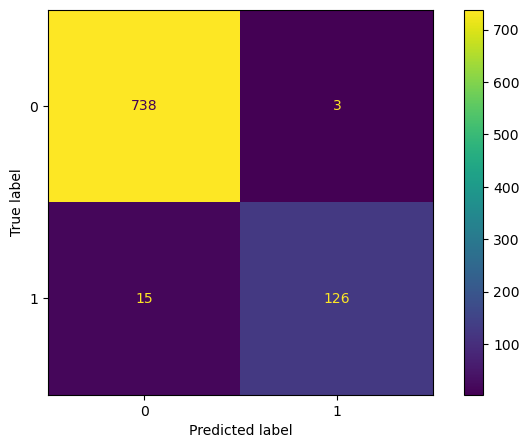

In [326]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,5))
y_pred = ml_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=ml_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ml_rf.classes_)
disp.plot(ax=ax)
plt.show()

### KNN

In [312]:
ml_knn = KNeighborsClassifier()
ml_knn.fit(X_train, y_train)

KNeighborsClassifier()

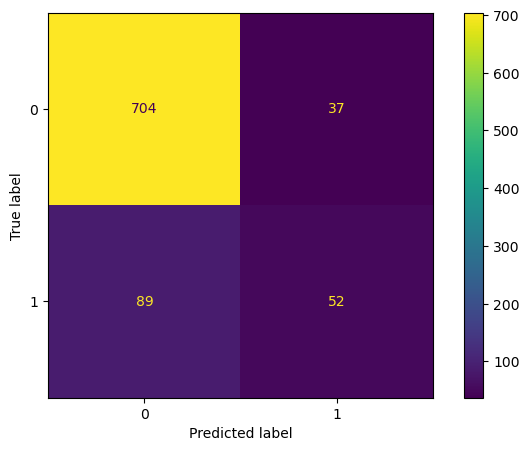

In [327]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,5))
y_pred = ml_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=ml_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ml_knn.classes_)
disp.plot(ax=ax)
plt.show()

### Decision Tree

In [328]:
from sklearn.tree import DecisionTreeClassifier

ml_dt = DecisionTreeClassifier()
ml_dt.fit(X_train, y_train)

DecisionTreeClassifier()

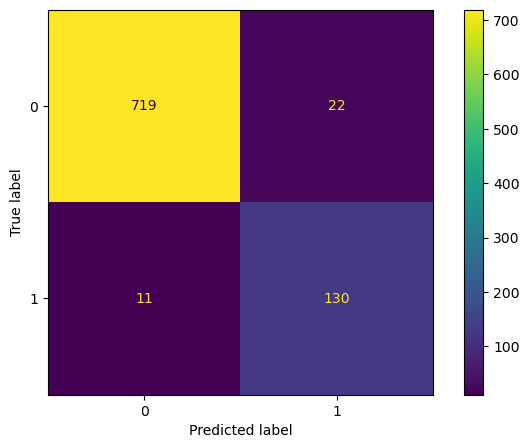

In [329]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,5))
y_pred = ml_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=ml_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ml_dt.classes_)
disp.plot(ax=ax)
plt.show()

# 5)Evaluation

### Logistic Regression

In [319]:
# classification report
# Attrition 'yes' = 1
from sklearn.metrics import classification_report
y_pred = lr_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       741
           1       0.70      0.23      0.34       141

    accuracy                           0.86       882
   macro avg       0.78      0.60      0.63       882
weighted avg       0.84      0.86      0.83       882



### Random Forest

In [347]:
# classification report
# Attrition 'yes' = 1
from sklearn.metrics import classification_report
y_pred = ml_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       741
           1       0.98      0.89      0.93       141

    accuracy                           0.98       882
   macro avg       0.98      0.94      0.96       882
weighted avg       0.98      0.98      0.98       882



### KNN

In [313]:
# classification report
# Attrition 'yes' = 1
from sklearn.metrics import classification_report
y_pred = ml_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       741
           1       0.58      0.37      0.45       141

    accuracy                           0.86       882
   macro avg       0.74      0.66      0.69       882
weighted avg       0.84      0.86      0.84       882



### Decision Tree

In [423]:
# classification report
# Attrition 'yes' = 1
from sklearn.metrics import classification_report
y_pred = ml_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       741
           1       0.86      0.92      0.89       141

    accuracy                           0.96       882
   macro avg       0.92      0.95      0.93       882
weighted avg       0.96      0.96      0.96       882



# Modeling with Hyperparameter Tuning

### Decision Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [183]:
# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()

# Definisikan grid parameter yang akan dijelajahi
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi pencarian grid
dt_clf_gridcv = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='recall')

# Lakukan penyetelan hiperparameter pada data train
dt_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [186]:
# the compact results
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
36,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.856140,1
63,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.856140,1
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.840351,3
37,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.836842,4
27,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.836842,4
...,...,...,...
15,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.298246,68
16,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.298246,68
12,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.298246,70
13,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.298246,70


In [427]:
# Tampilkan parameter terbaik yang ditemukan
print("Best parameters found:")
print(dt_clf_gridcv.best_params_)

# Evaluasi model terbaik pada data test
best_model = dt_clf_gridcv.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")


Best parameters found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.9671201814058957


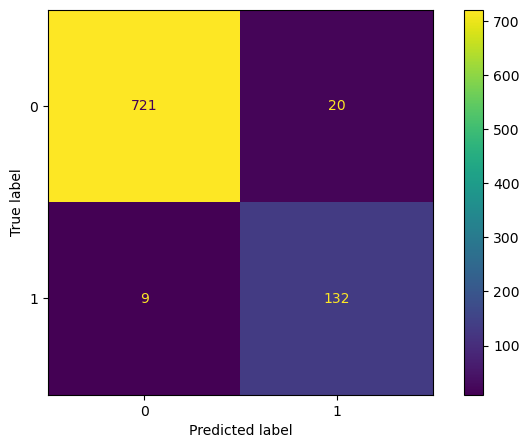

In [428]:
# plotting confusion matrix
# Attrition 'yes' = 1
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,5))
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Evaluation Model with Hyperparameter Tuning

### Decision Tree

In [429]:
# classification report
# Attrition 'yes' = 1
from sklearn.metrics import classification_report
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       741
           1       0.87      0.94      0.90       141

    accuracy                           0.97       882
   macro avg       0.93      0.95      0.94       882
weighted avg       0.97      0.97      0.97       882

